# Customer Segmentation with PCA and Clustering

## Project Introduction

In this project, I will embark on a journey to gain deeper insights into a grocery firm's customer database. The primary objective is customer segmentation, a crucial practice that involves categorizing customers into distinct groups based on shared characteristics. By doing so, we aim to enhance our understanding of customer behavior and tailor our products and services to meet their diverse needs and preferences.

## Understanding the Dataset

### Link to dataset: 
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### Dataset Description 

There are four groups of information:

**People** |  |  |  |  |  |  |  |  |  |
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
**ID** | **Year_Birth** | **Education** | **Marital_Status** | **Income** | **Kidhome** | **Teenhome** | **Dt_Customer** | **Recency** | **Complain** |
*Customer's unique identifier* | *Customer's birth year* | *Customer's education level* | *Customer's marital status* | *Customer's yearly household income* | *Number of children in customer's household* | *Number of teenagers in customer's household* | *Date of customer's enrollment with the company* | *Number of days since customer's last purchase* | *1 if the customer complained in the last 2 years, 0 otherwise* |

**Products** |  |  |  |  |  |  |
--- | --- | --- | --- | --- | --- | --- |
**MntWines** | **MntFruits** | **MntMeatProducts** | **MntFishProducts** | **MntSweetProducts** | **MntGoldProds** |
*Amount spent on wine in the last 2 years* | *Amount spent on fruits in the last 2 years* | *Amount spent on meat in the last 2 years* | *Amount spent on fish in the last 2 years* | *Amount spent on sweets in the last 2 years* | *Amount spent on gold in the last 2 years* |

**Promotion** |  |  |  |  |  |  |  |  |
--- | --- | --- | --- | --- | --- | --- | --- | --- |
**NumDealsPurchases** | **AcceptedCmp1** | **AcceptedCmp2** | **AcceptedCmp3** | **AcceptedCmp4** | **AcceptedCmp5** | **Response** |
*Number of purchases made with a discount* | *1 if the customer accepted the offer in the 1st campaign, 0 otherwise* | *1 if the customer accepted the offer in the 2nd campaign, 0 otherwise* | *1 if the customer accepted the offer in the 3rd campaign, 0 otherwise* | *1 if the customer accepted the offer in the 4th campaign, 0 otherwise* | *1 if the customer accepted the offer in the 5th campaign, 0 otherwise* | *1 if the customer accepted the offer in the last campaign, 0 otherwise* |

**Place** |  |  |  |  |
--- | --- | --- | --- | --- |
**NumWebPurchases** | **NumCatalogPurchases** | **NumStorePurchases** | **NumWebVisitsMonth** |
*Number of purchases made through the company’s website* | *Number of purchases made using a catalogue* | *Number of purchases made directly in stores* | *Number of visits to the company’s website in the last month* |

## Table of Contents

1. **[Import Libraries and Get to know Dataset](#1.-Import-Libraries-and-Get-to-know-Dataset)**
    - 1.1. [Import necessary Libraries and Packages](#1.1.-Import-necessary-Libraries-and-Packages)
    - 1.2. [Get basic information about the dataset](#1.2.-Get-basic-information-about-the-dataset)
    - 1.3. [Examine unique values of each column](#1.3.-Examine-unique-values-of-each-column)

2. **[Data Visualization and Transformation](#2.-Data-Visualization-and-Transformation)**
    - 2.1. [Visualize and transform categorical features](#2.1.-Visualize-and-transform-categorical-features)
    - 2.2. [Visualize and transform numerical features](#2.2.-Visualize-and-transform-numerical-features)
    - 2.3. [Drop redundant variables](#2.3.-Drop-redundant-variables)
    - 2.4. [Correlation Analysis](#2.4.-Correlation-Analysis)

3. **[Preprocessing](#3.-Preprocessing)**
    - 3.1. [Encoding](#3.1.-Encoding)
    - 3.2. [Scale the Data](#3.2.-Scale-the-Data)

4. **[Dimensionality Reduction](#4.-Dimensionality-Reduction)**
    - 4.1. [Initialize PCA object](#4.1.-Initialize-PCA-object)
    - 4.2. [Identify the Optimal Number of Components](#4.2.-Identify-the-Optimal-Number-of-Components)
    - 4.3. [Conclusion about n_components](#4.3.-Conclusion-about-n_components)

5. **[Customer Segmentation using K-Means Clustering](#5.-Customer-Segmentation-using-K-Means-Clustering)**
    - 5.1. [Initialize model](#5.1.-Initialize-model)
    - 5.2. [Choose k](#5.2.-Choose-k)
    - 5.3. [Determining the Optimal Number of Clusters: Elbow vs. Silhouette](#5.3.-Determining-the-Optimal-Number-of-Clusters:-Elbow-vs.-Silhouette)

6. **[Evaluate the Clusters](#6.-Evaluate-the-Clusters)**

7. **[Final conclusion](#7.-Final-conclusion)**

## 1. Import Libraries and Get to know Dataset

### 1.1. Import necessary Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


sns.set_theme(style='white')
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

### 1.2. Get basic information about the dataset

In [2]:
original_df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
print(original_df.shape)
original_df.head()

(2240, 29)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.00        0         0   
1  2174        1954  Graduation         Single 46344.00        1         1   
2  4141        1965  Graduation       Together 71613.00        0         0   
3  6182        1984  Graduation       Together 26646.00        1         0   
4  5324        1981         PhD        Married 58293.00        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [3]:
df = original_df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Change `Year_Enrolled` to datetime

In [5]:
df['Year_Enrolled'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [6]:
missing_encountered = False

for col in df.columns:
    missing = df[col].isnull().sum()
    if missing > 0:
        print(f'{col}: {missing} missing values.')
        missing_encountered = True
        
if not missing_encountered:
    print("No missing values.")

Income: 24 missing values.


The dataset comprises 29 columns, out of which 25 are integer variables, 3 are objects, and 1 is a float. And `Income` variable is the only one having missing values.

### 1.3. Examine unique values of each column

In [7]:
data = []
for col in df.columns:
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    dtype = df[col].dtype
    if num_unique > 10:
        data.append((col, num_unique, "", dtype))
    else:
        unique_values_str = ", ".join(map(str, unique_values))
        data.append((col, num_unique, unique_values_str, dtype))

uniques = pd.DataFrame(data, columns=["Column", "# of Uniques", "Unique Values (<10)", "Dtype"])
uniques.sort_values(by='# of Uniques').reset_index(drop=True)

Column  # of Uniques  \
0             Z_Revenue             1   
1         Z_CostContact             1   
2          AcceptedCmp2             2   
3              Response             2   
4          AcceptedCmp1             2   
5          AcceptedCmp5             2   
6          AcceptedCmp3             2   
7              Complain             2   
8          AcceptedCmp4             2   
9              Teenhome             3   
10              Kidhome             3   
11            Education             5   
12       Marital_Status             8   
13  NumCatalogPurchases            14   
14    NumStorePurchases            14   
15    NumDealsPurchases            15   
16      NumWebPurchases            15   
17    NumWebVisitsMonth            16   
18           Year_Birth            59   
19              Recency           100   
20            MntFruits           158   
21     MntSweetProducts           177   
22      MntFishProducts           182   
23         MntGoldProds           213   
24      MntMeatProducts           558   
25        Year_Enrolled           663   
26          Dt_Customer           663   
27             MntWines           776   
28               Income          1975   
29                   ID          2240   

                                  Unique Values (<10)           Dtype  
0                                                  11           int64  
1                                                   3           int64  
2                                                0, 1           int64  
3                                                1, 0           int64  
4                                                0, 1           int64  
5                                                0, 1           int64  
6                                                0, 1           int64  
7                                                0, 1           int64  
8                                                0, 1           int64  
9                                             0, 1, 2           int64  
10                                            0, 1, 2           int64  
11           Graduation, PhD, Master, Basic, 2n Cycle          object  
12  Single, Together, Married, Divorced, Widow, Al...          object  
13                                                              int64  
14                                                              int64  
15                                                              int64  
16                                                              int64  
17                                                              int64  
18                                                              int64  
19                                                              int64  
20                                                              int64  
21                                                              int64  
22                                                              int64  
23                                                              int64  
24                                                              int64  
25                                                     datetime64[ns]  
26                                                             object  
27                                                              int64  
28                                                            float64  
29                                                              int64

**Note:**

- **1 Unique Value**: Variables `Z_Revenue` and `Z_CostContact` exhibit a singular value, implying no contribution to our clustering analysis. Consequently, I will remove them from the dataset.

- **2 Unique Values**: Variables `AcceptedCmp1` to `AcceptedCmp5`, `Complain`, and `Response` adopt binary options. I intend to visualize them to assess the potential for combining these variables.

- **3 Unique Values**: Variables `Teenhome` and `Kidhome` can be amalgamated into a single variable named `Dependents`.

- **`Education`**: The `Education` variable entails five categories: 'Graduation', 'PhD', 'Master', 'Basic', and '2n Cycle'. After researching the significance of 'Basic' and '2n Cycle' education levels:
    - 'Basic' signifies foundational or primary education. This category will be retained as is.
    - '2n Cycle' represents advanced studies beyond a bachelor's degree (1st Cycle). It will be merged with the 'Master' category.

- **`Marital_Status`**: With eight categories, namely Single, Together, Married, Divorced, Widow, Absurb, YOLO, I propose merging them into two categories: 'Relationship' and 'Single'.

- **`ID`**: This variable is deemed non-contributory and will be excluded from further analysis.

- **`Year_Birth`**: To enhance interpretability, I will transform the `Year_Birth` variable into `Age` using the maximum engagement day as a reference threshold.

- **`Year_Enrolled`**: Similar to `Year_Birth`, I will create a new variable named `Days_Enrolled` by employing the same methodology.

- Other categorical variables that encompass more than 10 options will remain unaltered.


## 2. Data Visualization and Transformation

In this stage, I will conduct data cleaning as mentioned above:

Before that, I will plot some chart:

### 2.1. Visualize and transform categorical features


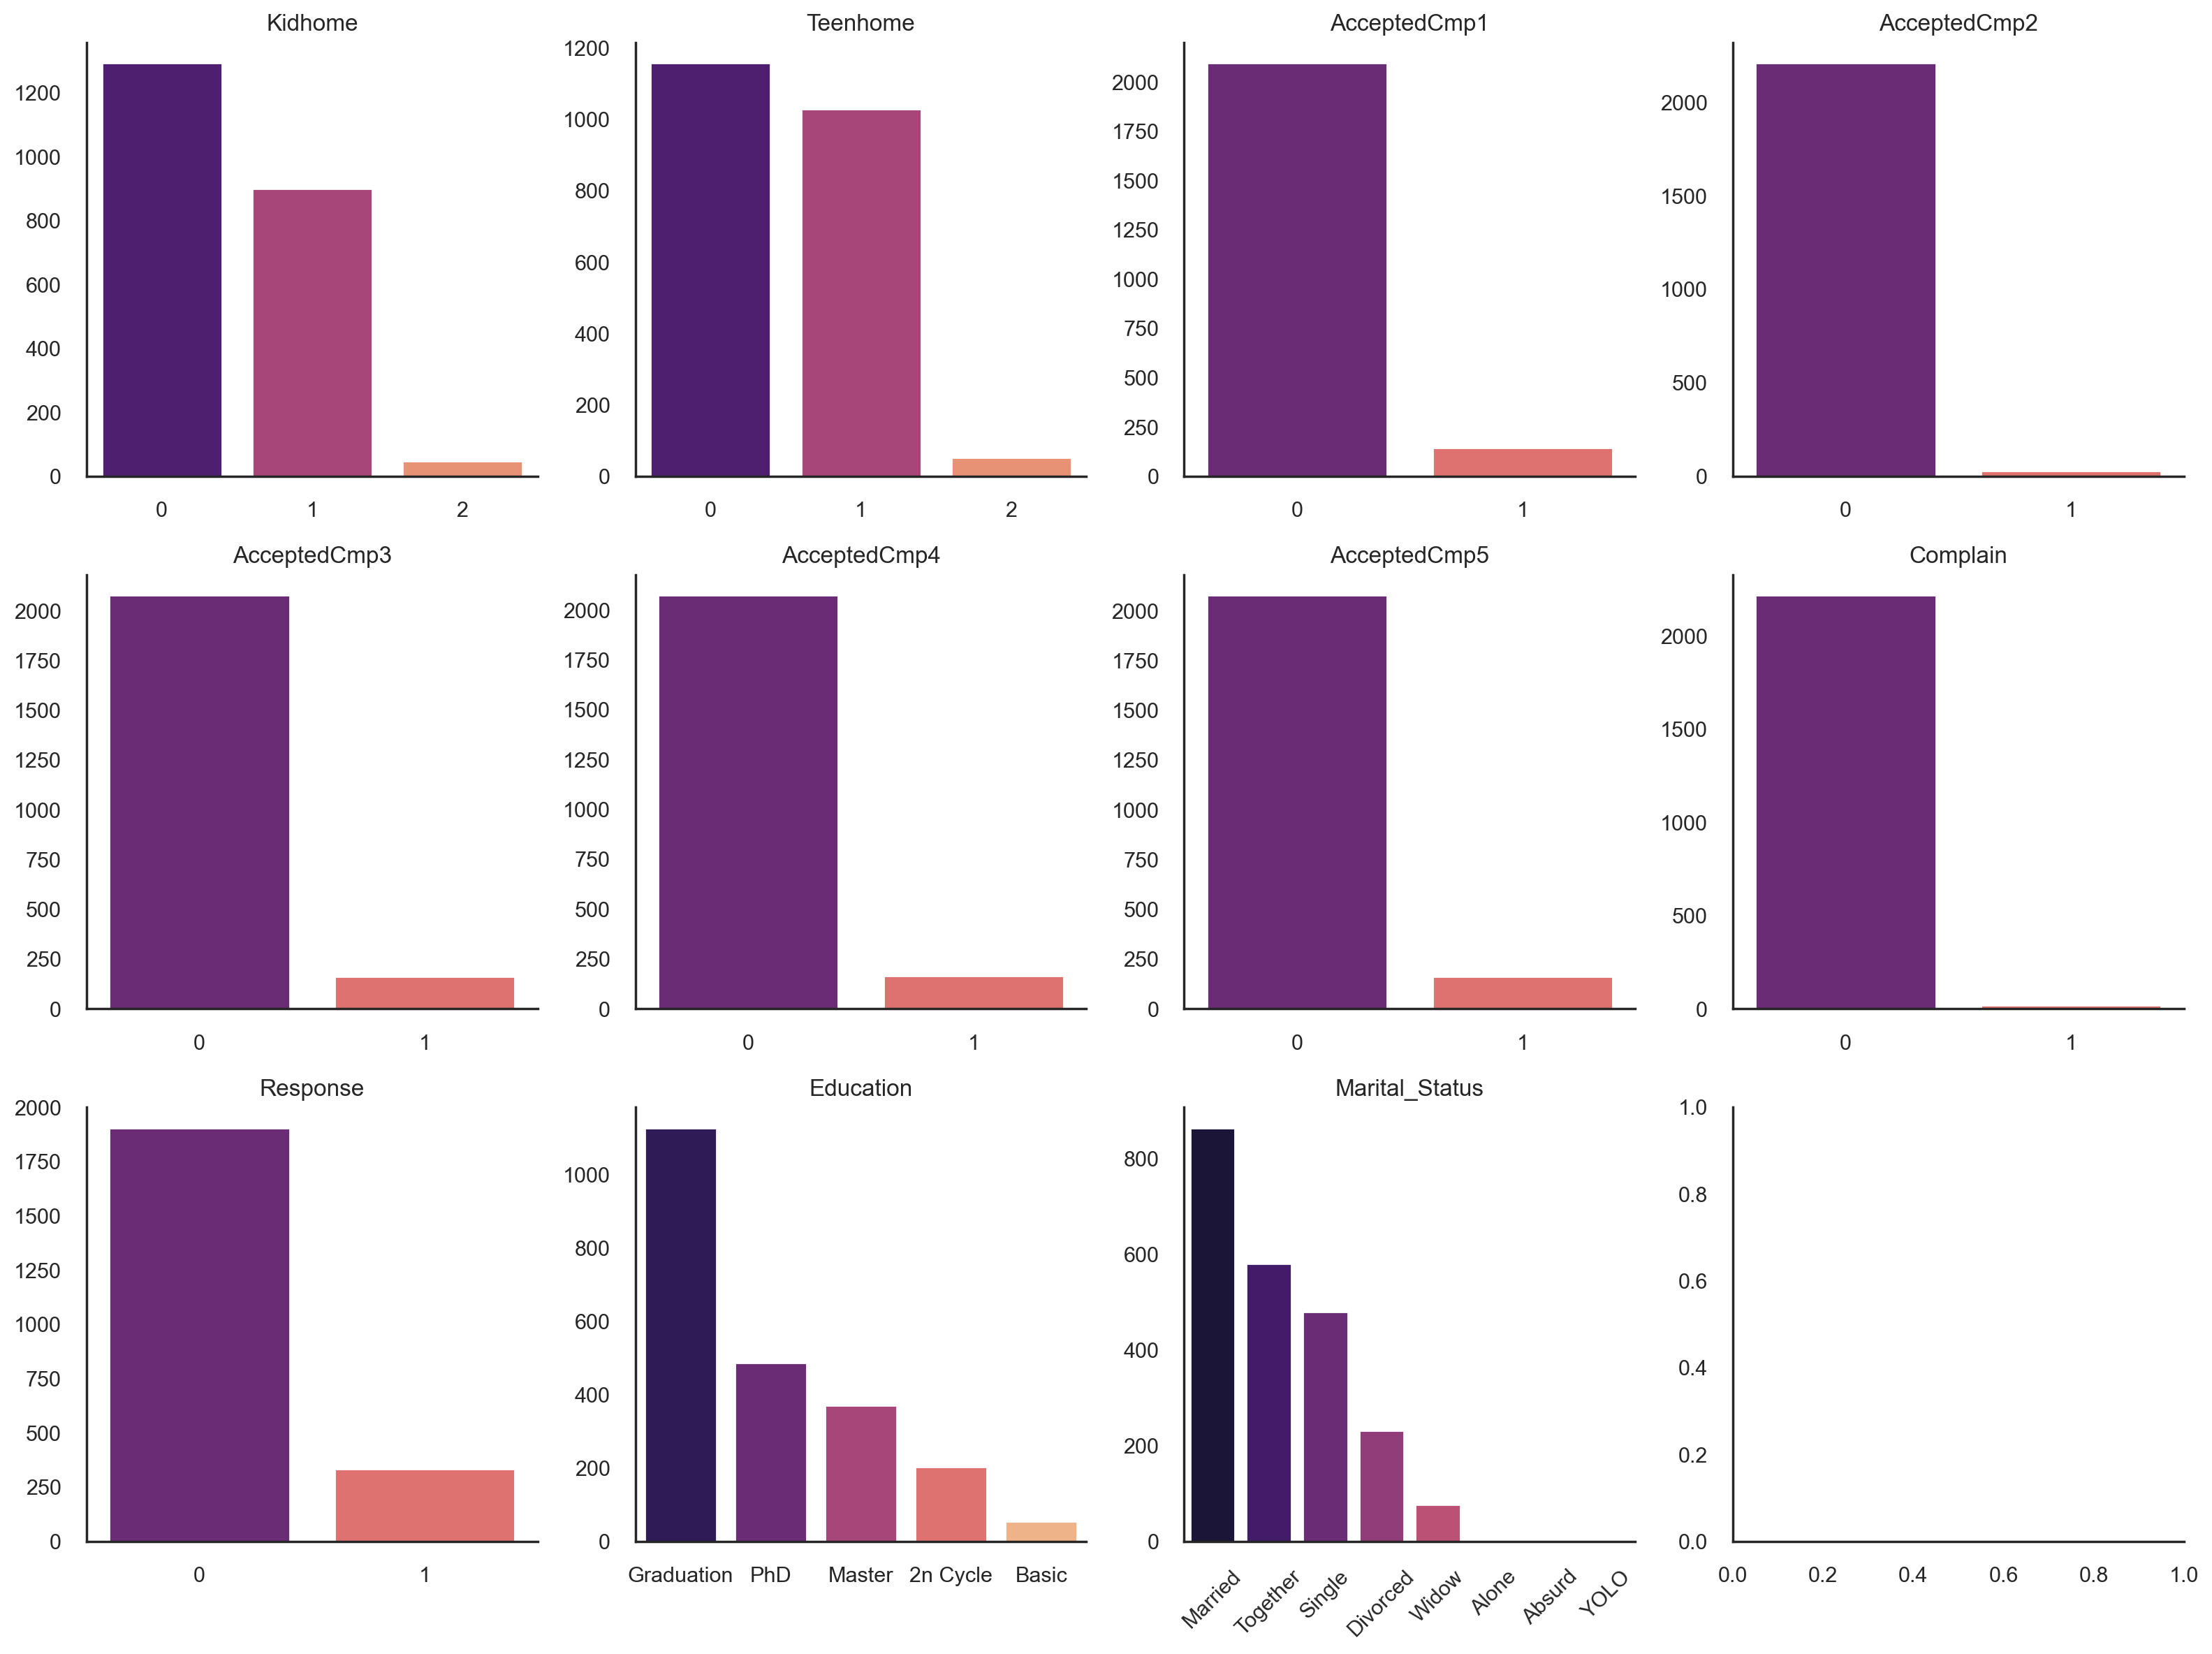

In [8]:
categorical_cols = [
    'Kidhome', 
    'Teenhome', 
    'AcceptedCmp1', 
    'AcceptedCmp2', 
    'AcceptedCmp3', 
    'AcceptedCmp4', 
    'AcceptedCmp5',
    'Complain', 
    'Response',
    'Education',
    'Marital_Status'
]

fig, axes = plt.subplots(3, 4, figsize=(16, 12))

for i, col in enumerate(categorical_cols):
    order = df[col].value_counts().index
    ax = axes[i // 4, i % 4]
    sns.countplot(data=df, x=col, ax=ax, order=order, palette='magma')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    if col == 'Marital_Status':  
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()


#### Examine `Complain`

In [9]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

The highly imbalanced distribution of the `Complain` variable (21 occurrences of 1 and 2219 occurrences of 0) might not contribute meaningful insights to customer segmentation so I will drop this variable.

#### Examine `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4` and `AcceptedCmp5`:

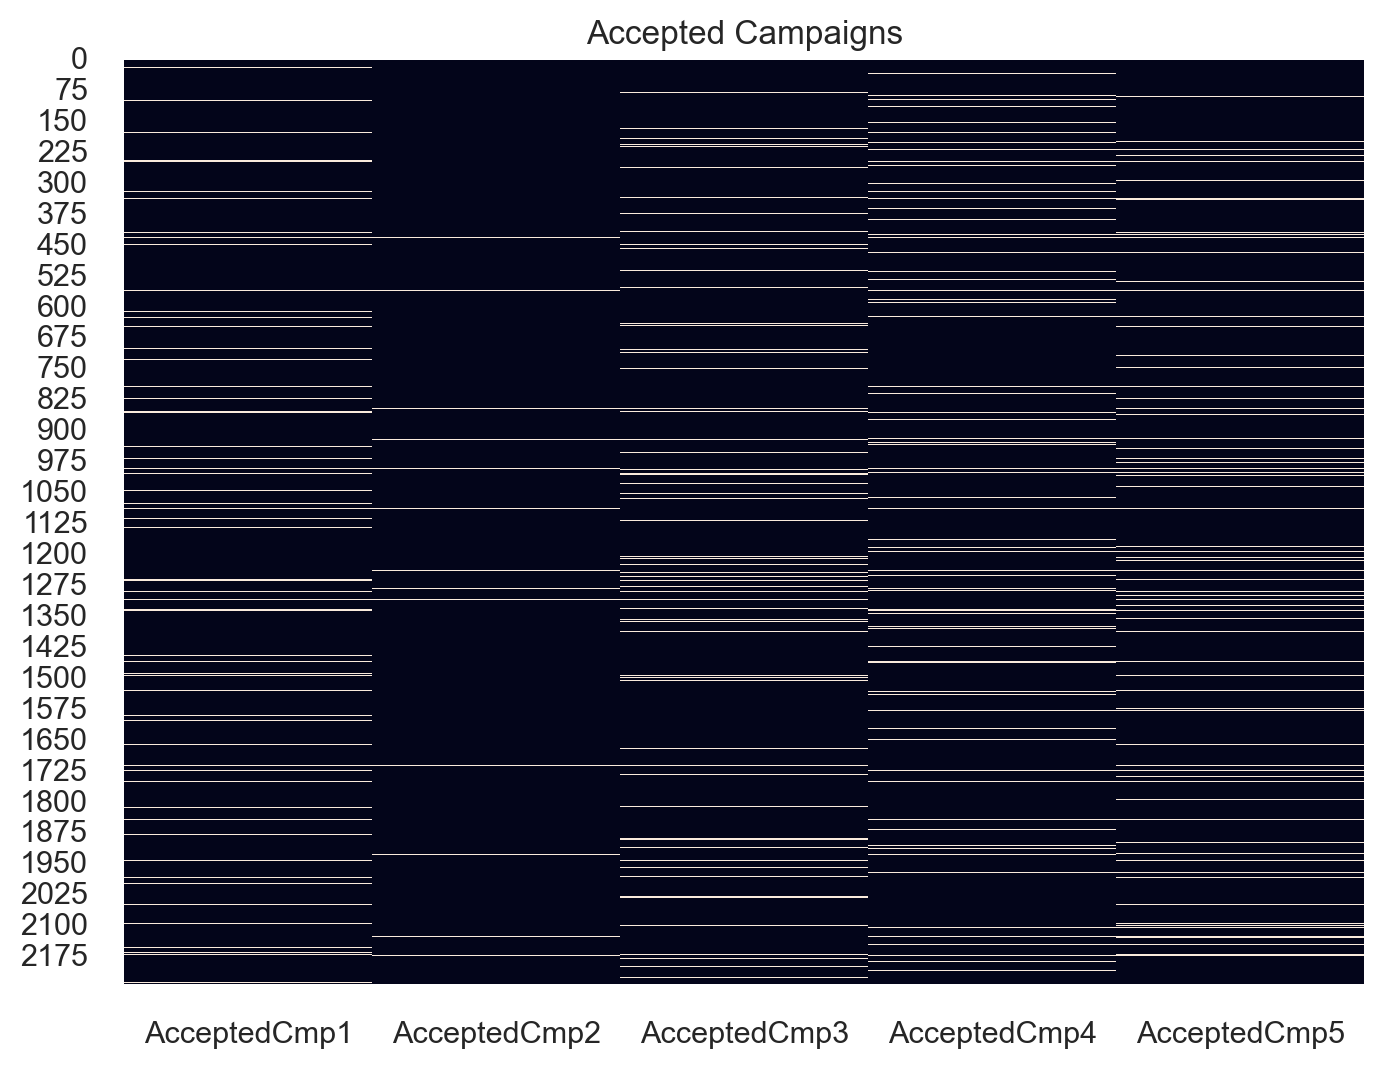

In [10]:
accepted = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
plt.figure(figsize=(8, 6))
sns.heatmap(accepted, cbar=False)
plt.title('Accepted Campaigns');

I think we can create a `Accepted_Campaign` variable to sum up the fives:

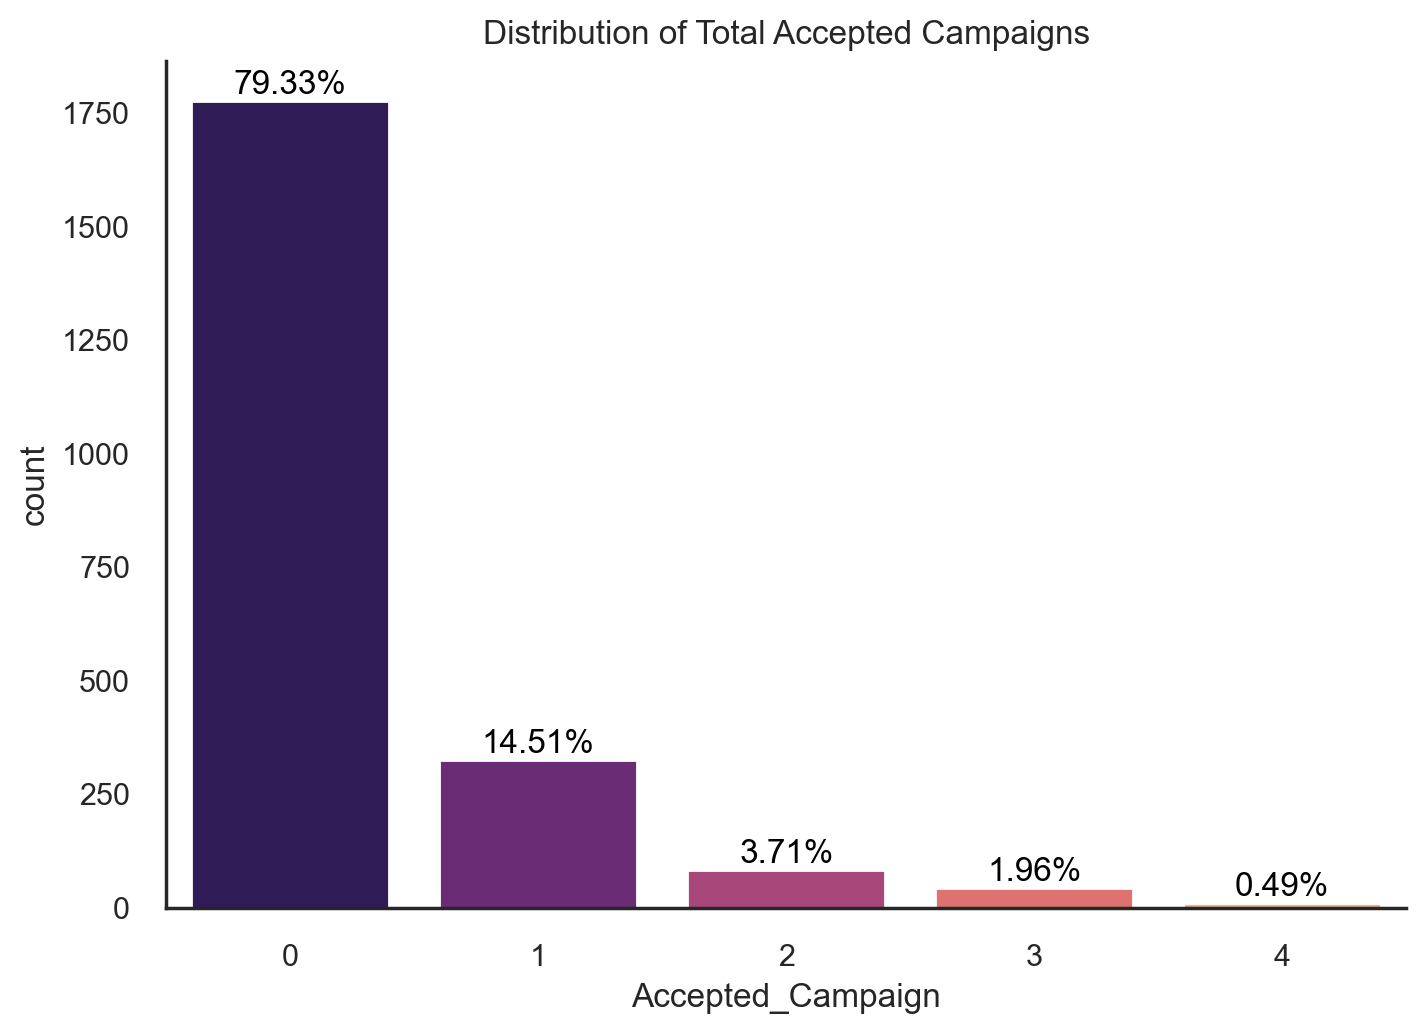

In [11]:
df['Accepted_Campaign'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1)
prop_accepted_campaign = df['Accepted_Campaign'].value_counts(normalize=True)

sns.countplot(x=df['Accepted_Campaign'], palette='magma')
for i, prop in enumerate(prop_accepted_campaign):
    plt.text(i, prop * len(df), f'{prop:.2%}', ha='center', va='bottom', color='black', fontsize=12)
plt.title('Distribution of Total Accepted Campaigns');

The distribution of accepted campaigns among customers is skewed, with most customers (approximately 79%) not accepting any campaigns. Around 15% of customers accepted one campaign, while smaller proportions engaged with two, three, or four campaigns, with the latter category having negligible representation.

#### Create `Dependents` variable

In [12]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

#### Grouping `Marital_Status`

In [13]:
group_mapping = {
    'Married': 'Relationship',
    'Together': 'Relationship',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

df['Marital_Status'] = df['Marital_Status'].map(group_mapping)

#### Grouping `Education`

In [14]:
education_mapping = {
    'Graduation': 'Graduation',
    'PhD': 'PhD',
    'Master': 'Master',
    'Basic': 'Basic',
    '2n Cycle': 'Master'  
}

df['Education'] = df['Education'].map(education_mapping)

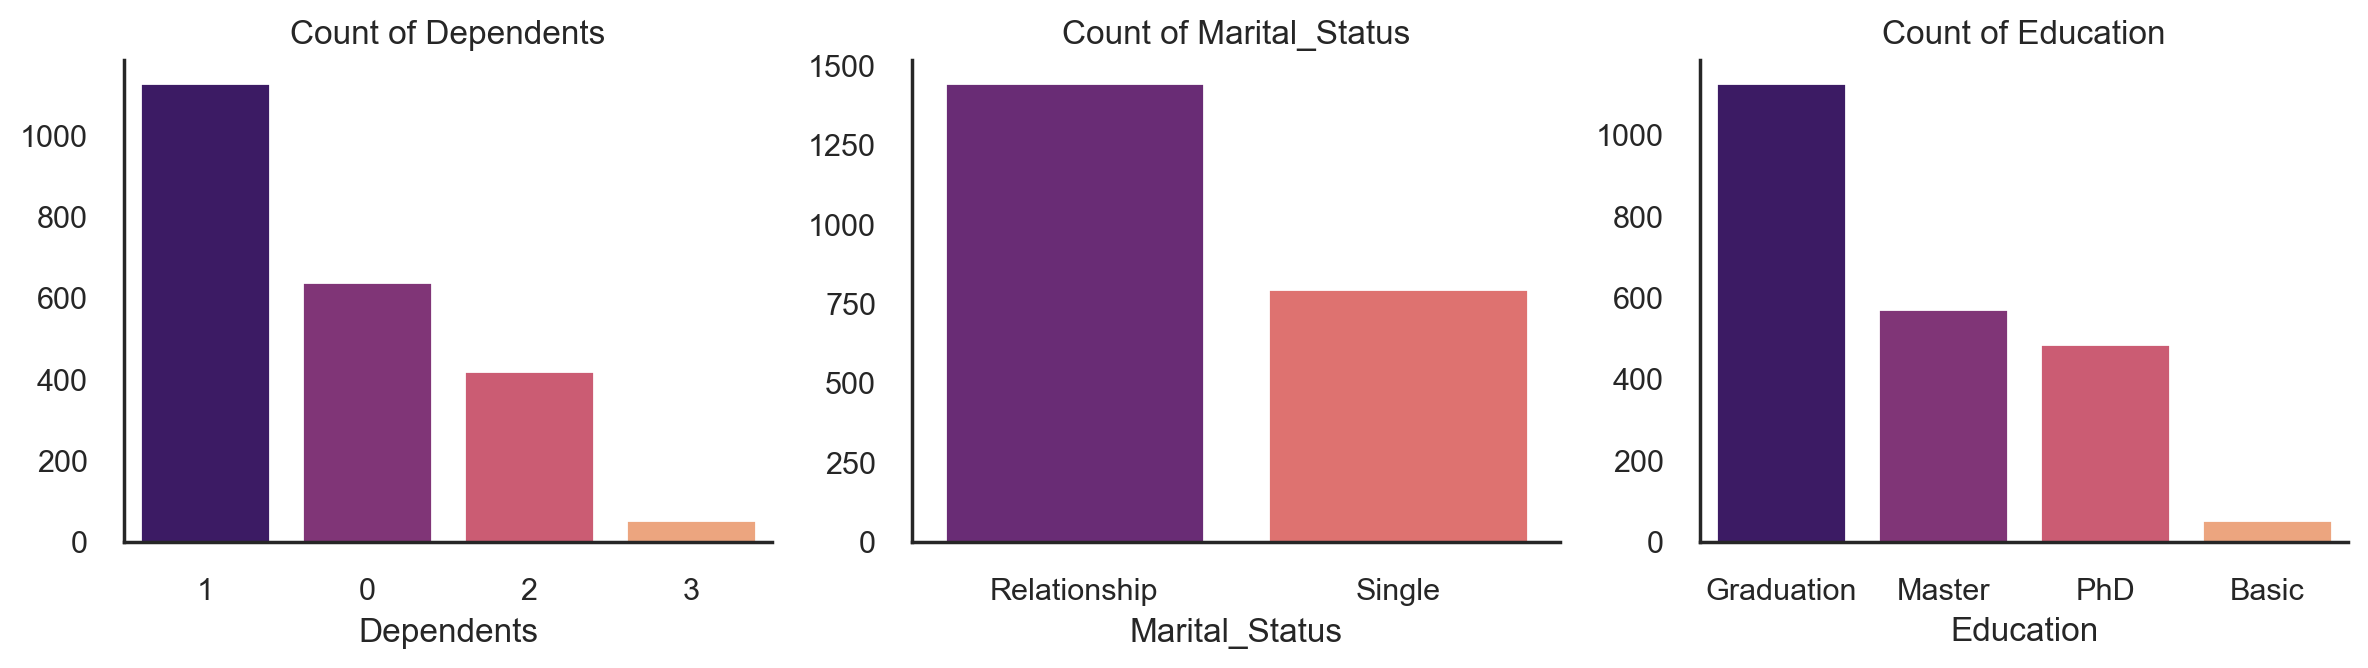

In [15]:
plt.figure(figsize=(12, 3.5))

categories = ['Dependents', 'Marital_Status', 'Education']
palette = 'magma'

for i, col in enumerate(categories, 1):
    plt.subplot(1, 3, i)
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, palette=palette, order=order)
    plt.title(f'Count of {col}')
    plt.ylabel('')

plt.tight_layout();

### 2.2. Visualize and transform numerical features

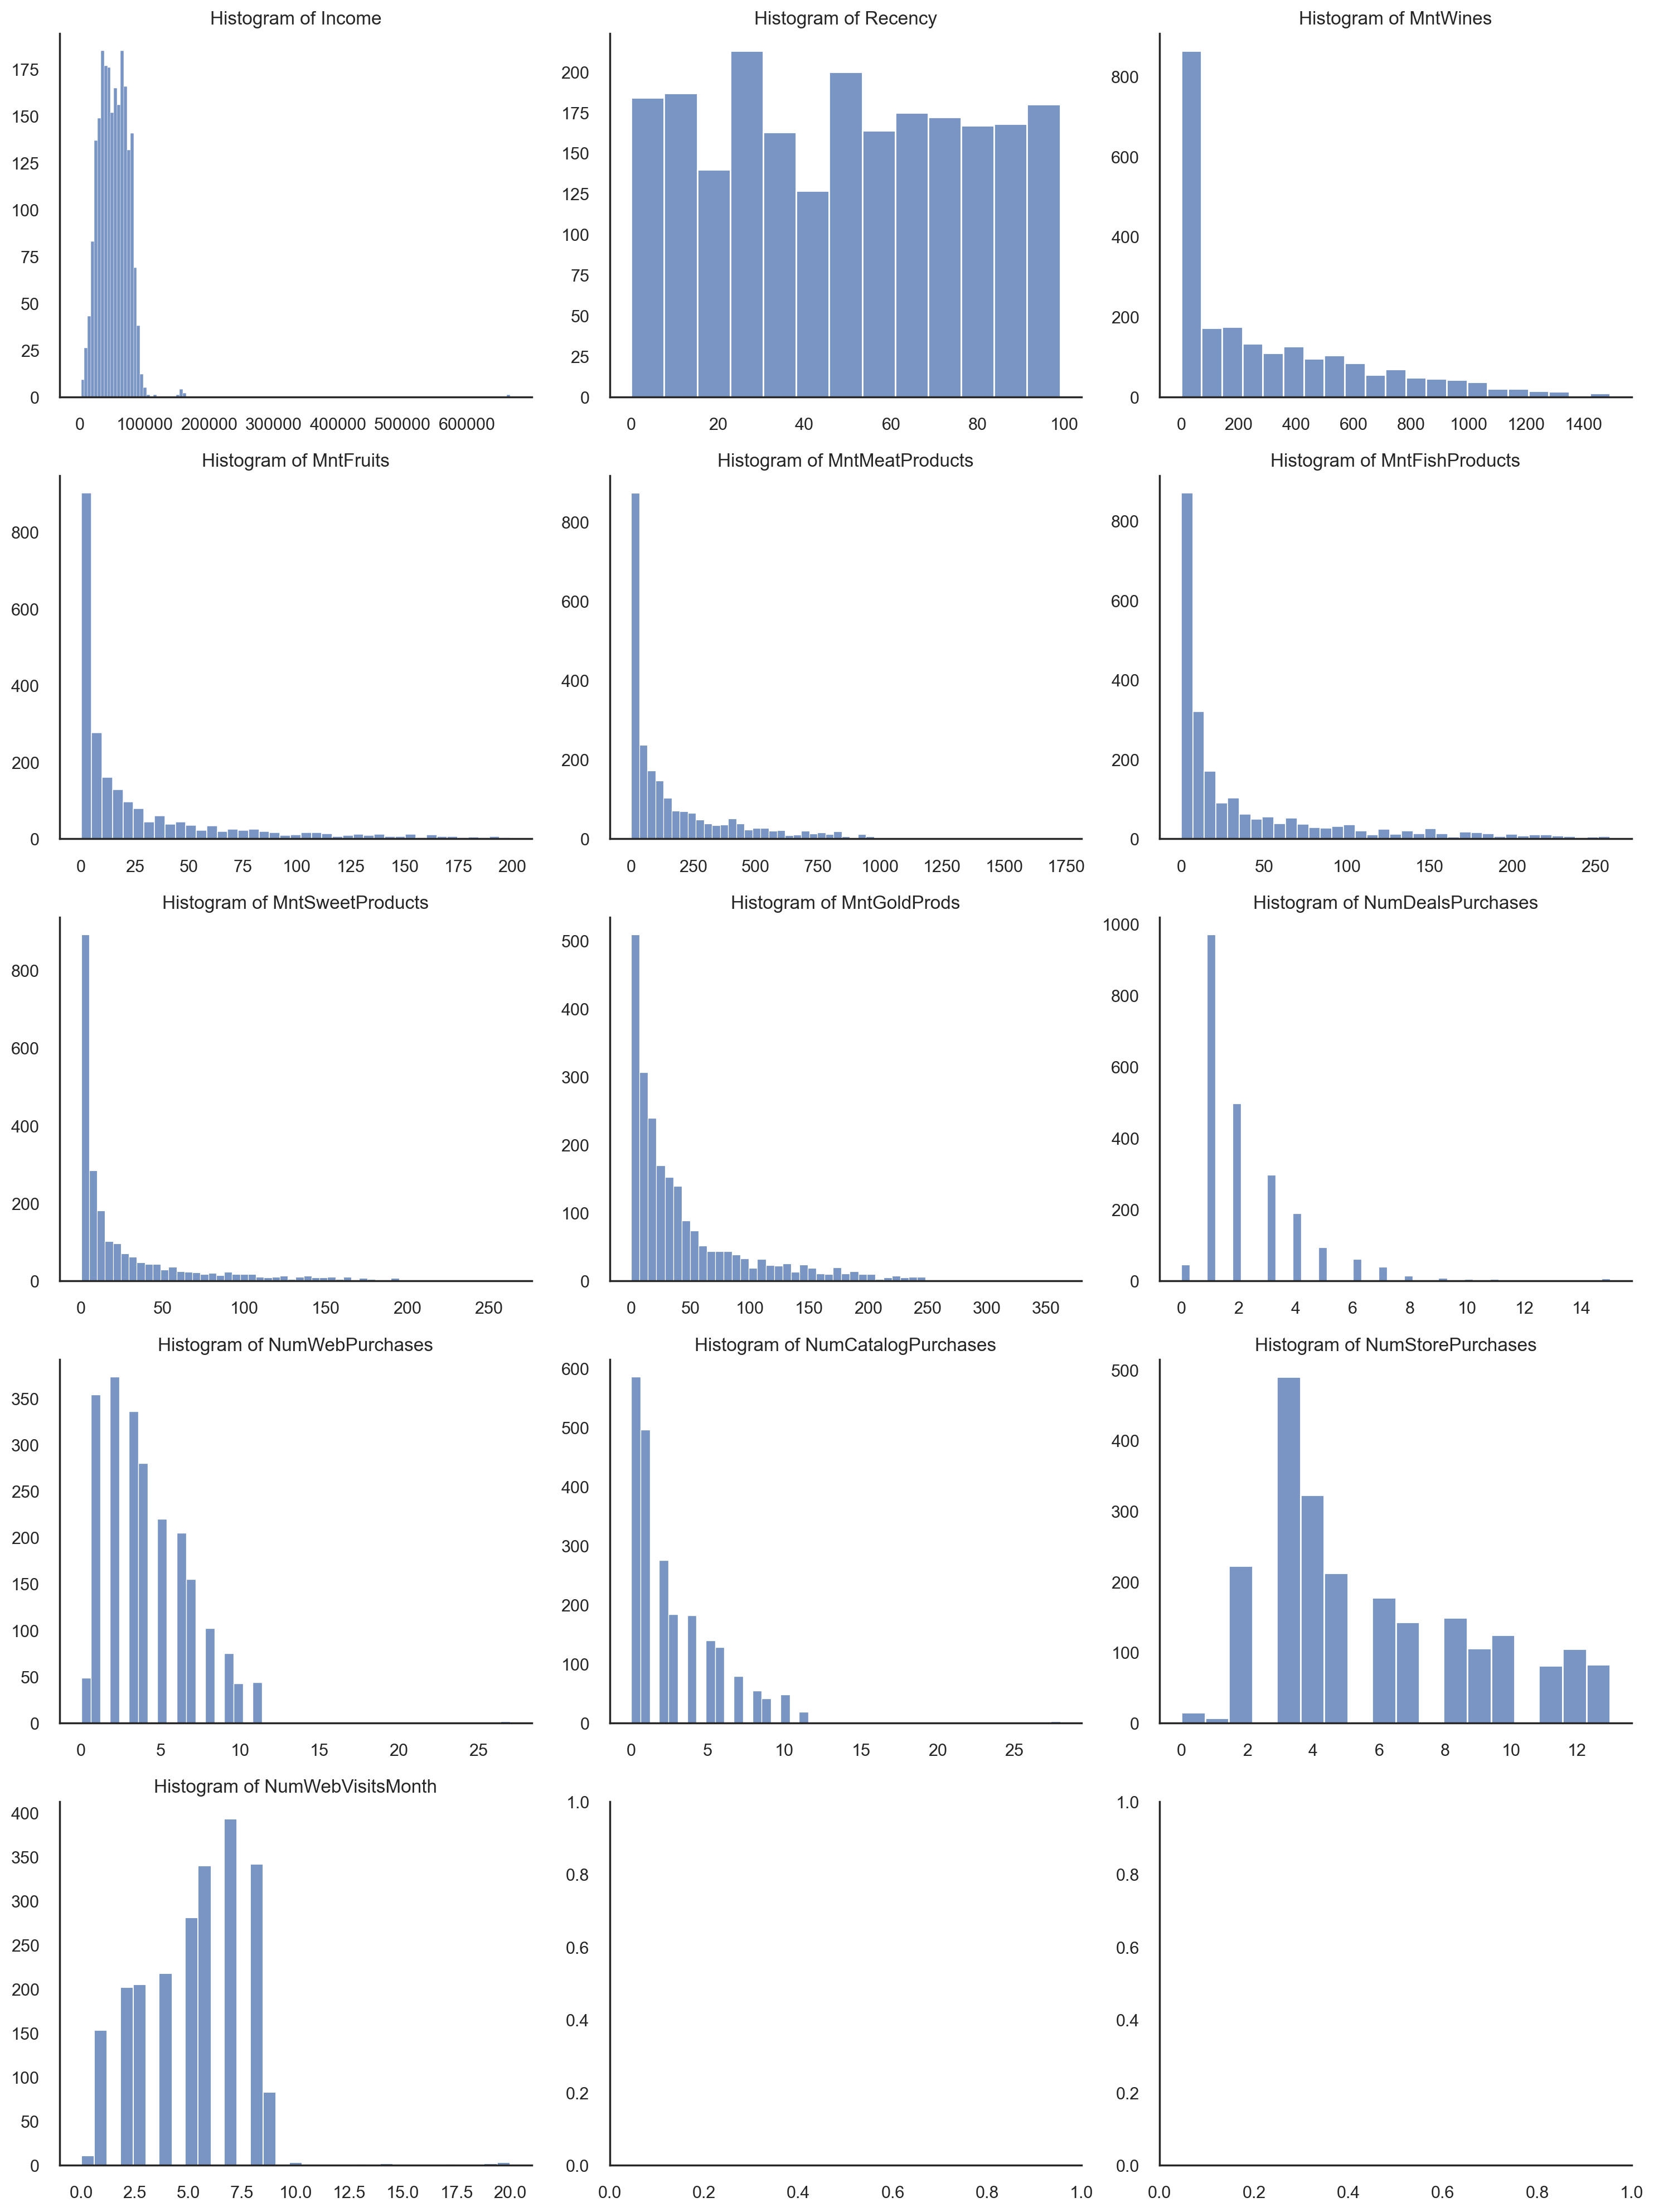

In [16]:
numeric_cols = [
    'Income', 'Recency', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth'
]

fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i, col in enumerate(numeric_cols):
    ax = axes[i // 3, i % 3]
    sns.histplot(data=df, x=col, ax=axes[i // 3, i % 3])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'Histogram of {col}')
plt.tight_layout();

#### Examine outliers of `Income`

In [17]:
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

In [18]:
df[df['Income'] > 100000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
124    7215        1983  Graduation         Single 101970.00        0   
164    8475        1973         PhD   Relationship 157243.00        0   
203    2798        1977         PhD   Relationship 102160.00        0   
252   10089        1974  Graduation         Single 102692.00        0   
617    1503        1976         PhD   Relationship 162397.00        1   
646    4611        1970  Graduation   Relationship 105471.00        0   
655    5555        1975  Graduation         Single 153924.00        0   
687    1501        1982         PhD   Relationship 160803.00        0   
1300   5336        1971      Master   Relationship 157733.00        1   
1653   4931        1977  Graduation   Relationship 157146.00        0   
1898   4619        1945         PhD         Single 113734.00        0   
2132  11181        1949         PhD   Relationship 156924.00        0   
2233   9432        1977  Graduation   Relationship 666666.00        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
124          0  12-03-2013       69       722         27              102   
164          1  01-03-2014       98        20          2             1582   
203          0  02-11-2012       54       763         29              138   
252          0  05-04-2013        5       168        148              444   
617          1  03-06-2013       31        85          1               16   
646          0  21-01-2013       36      1009        181              104   
655          0  07-02-2014       81         1          1                1   
687          0  04-08-2012       21        55         16             1622   
1300         0  04-06-2013       37        39          1                9   
1653         0  29-04-2013       13         1          0             1725   
1898         0  28-05-2014        9         6          2                3   
2132         0  29-08-2013       85         2          1                2   
2233         0  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
124                44                72           168                  0   
164                 1                 2             1                 15   
203                76               176            58                  0   
252                32               172           148                  1   
617                 2                 1             2                  0   
646               202                21           207                  0   
655                 1                 1             1                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
1653                2                 1             1                  0   
1898                1               262             3                  0   
2132                1                 1             1                  0   
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
124                 6                    8                 13   
164                 0                   22                  0   
203                 7                    9                 10   
252                 6                    9                 13   
617                 0                    0                  1   
646                 9                    8                 13   
655                 0                    0                  0   
687                 0                   28                  1   
1300                1                    0                  1   
1653                0                   28                  0   
1898               27                    0                  0   
2132                0                    0                  0 

**Note:** 

There are 13 individuals with an income exceeding 100,000, all of whom possess education starting from 'Graduation' level and beyond. The highest reported income among them stands at 666,666.

Now let's re-plot:

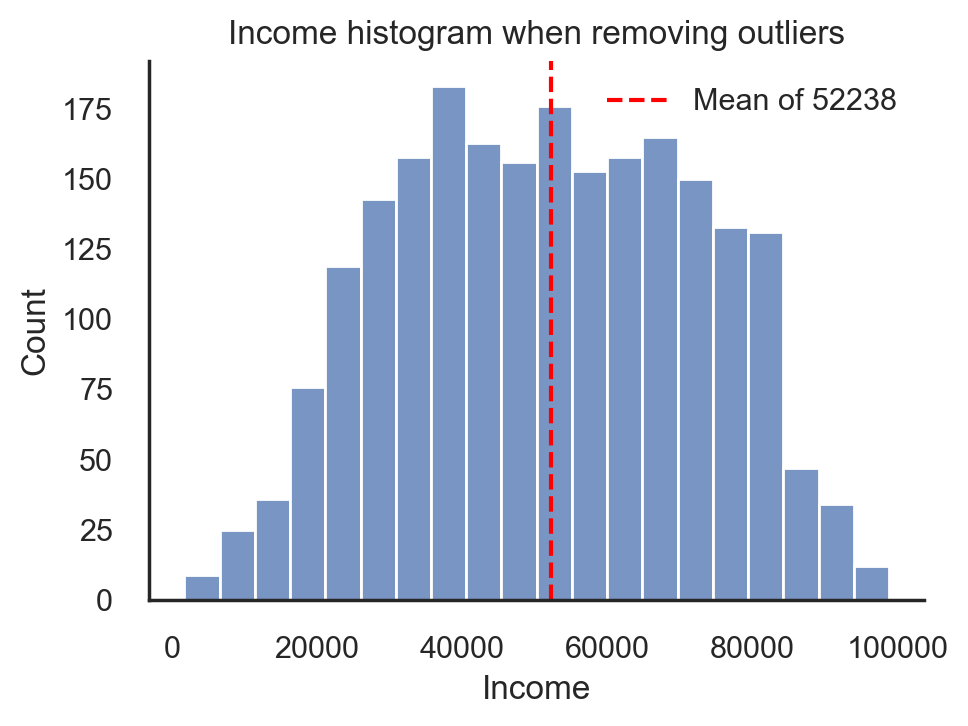

In [19]:
plt.figure(figsize=(5, 3.5))

sns.histplot(data=df[~(df['Income'] > 100000)], x='Income')
plt.axvline(df['Income'].mean(), color='red', linestyle='--', label=f"Mean of {df['Income'].mean():.0f}")
plt.title('Income histogram when removing outliers')
plt.legend();

**Note:** 

The distribution now is pretty normal.

#### Create `Day_Enrolled`

In [20]:
threshold = df['Year_Enrolled'].max()

df['Day_Enrolled'] = (threshold - df['Year_Enrolled']).dt.days

#### Create `Age`

In [21]:
threshold = df['Year_Enrolled'].dt.year.max()

df['Age'] = threshold - df['Year_Birth']

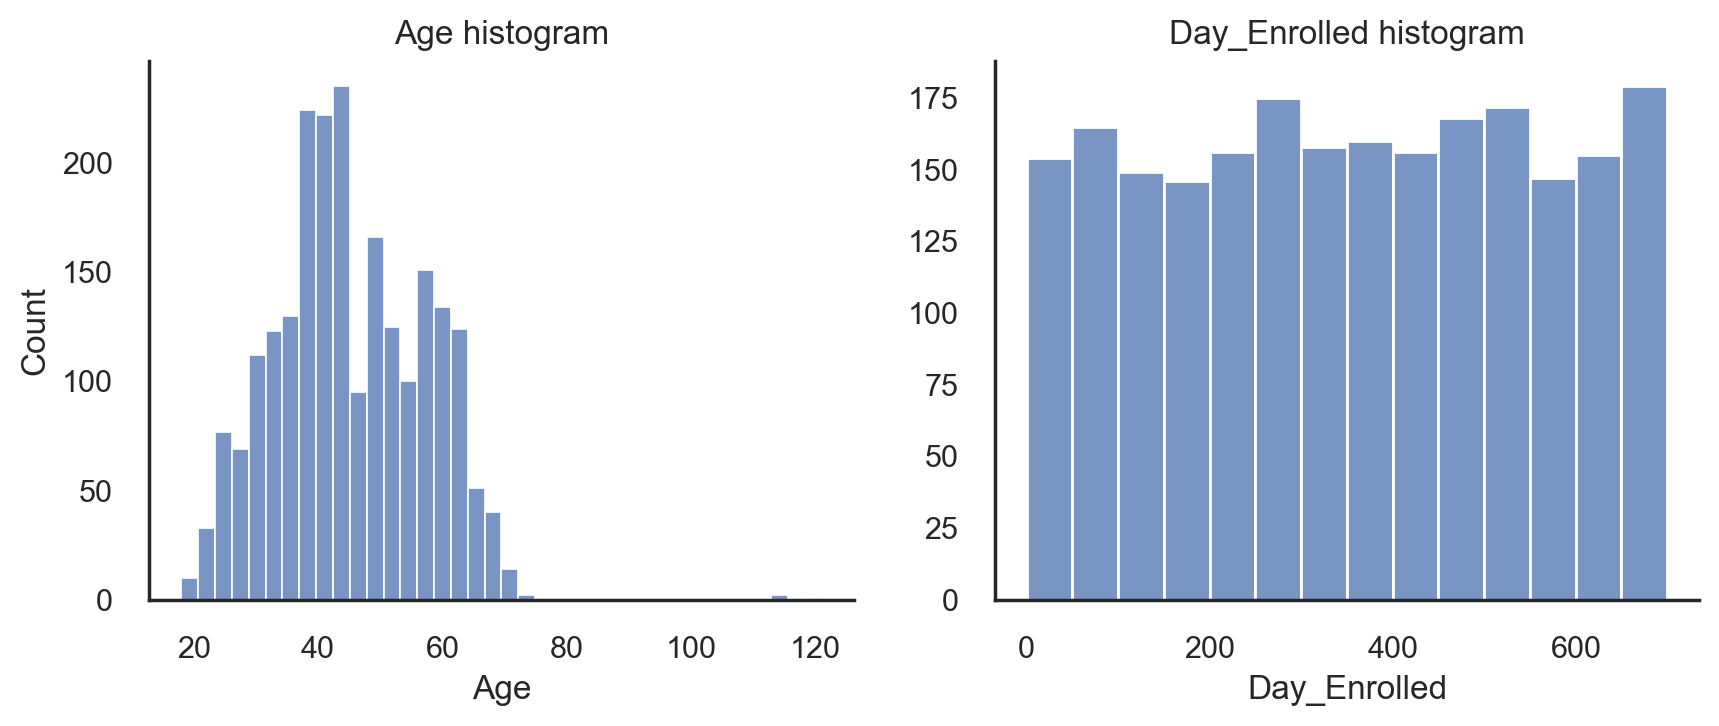

In [22]:
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age')
plt.title('Age histogram');
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Day_Enrolled')
plt.title('Day_Enrolled histogram')
plt.ylabel('');

#### Check `Age`'s outliers

In [23]:
df[df['Age'] > 80]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900    Master         Single 36640.00        1         0   
239  11004        1893    Master         Single 60182.00        0         1   
339   1150        1899       PhD   Relationship 83532.00        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192  26-09-2013       99        15          6                8   
239  17-05-2014       23         8          0                5   
339  26-09-2013       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
192             0             0         1              3         11         0   
239             0             0         0              3         11         0   
339             0             0         0              3         11         0   

    Year_Enrolled  Accepted_Campaign  Dependents  Day_Enrolled  Age  
192    2013-09-26                  0           1           276  114  
239    2014-05-17                  0           1            43  121  
339    2013-09-26                  1           0           276  115

**Note:** 

Only 3 people more than 80 years old but more interestingly, they are all above 110 years old, with the oldest is 121 years.

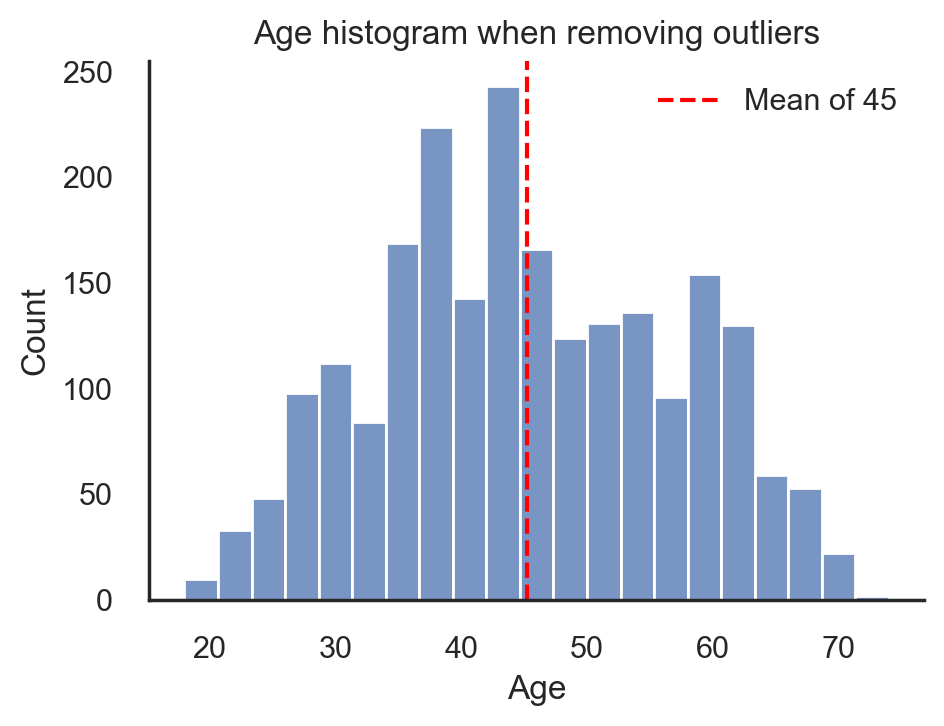

In [24]:
plt.figure(figsize=(5, 3.5))
sns.histplot(data=df[~(df['Age'] > 80)], x='Age')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label= f"Mean of {df['Age'].mean():.0f}")
plt.title('Age histogram when removing outliers')
plt.legend();

**Note:**

The age distribution exhibits a normal pattern after the removal of outliers.

#### Create `Total_Cost` and `Total_Purchase`:

In [25]:
df['Total_Cost'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

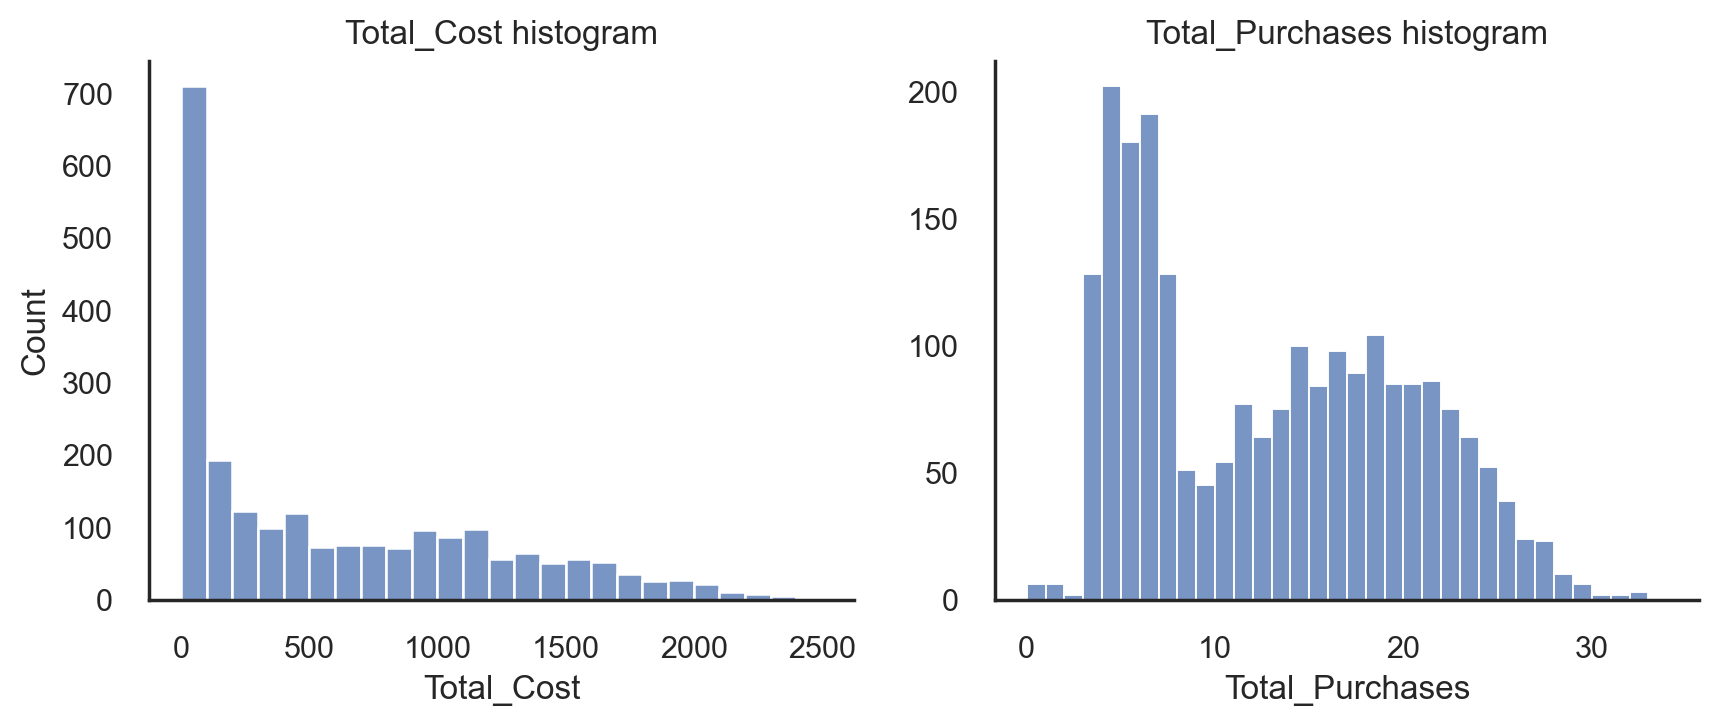

In [26]:
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Total_Cost', bins=range(0,2501,100))
plt.title('Total_Cost histogram');
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Total_Purchases', bins=range(0,35,1))
plt.title('Total_Purchases histogram')
plt.ylabel('');

### 2.3. Drop redundant variables

Droping is important because it can helps to reduce the number of dimensionsity and complexity of model

In [27]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones(corr.shape), k=1).astype(np.bool_)
corr = corr.where(mask)
corr = corr.unstack().sort_values(ascending=False).to_frame(name='Correlation')
corr = corr[corr['Correlation'] != 1].reset_index()
corr = corr.dropna()
corr.head(20)

level_0              level_1  Correlation
0            Total_Cost             MntWines         0.89
1       Total_Purchases    NumStorePurchases         0.86
2            Total_Cost      MntMeatProducts         0.84
3       Total_Purchases           Total_Cost         0.82
4       Total_Purchases  NumCatalogPurchases         0.79
5            Total_Cost  NumCatalogPurchases         0.78
6       Total_Purchases      NumWebPurchases         0.77
7       Total_Purchases             MntWines         0.76
8   NumCatalogPurchases      MntMeatProducts         0.72
9     Accepted_Campaign         AcceptedCmp5         0.72
10           Dependents             Teenhome         0.70
11           Dependents              Kidhome         0.69
12    Accepted_Campaign         AcceptedCmp1         0.68
13           Total_Cost    NumStorePurchases         0.67
14           Total_Cost               Income         0.66
15           Total_Cost      MntFishProducts         0.64
16    NumStorePurchases             MntWines         0.64
17  NumCatalogPurchases             MntWines         0.64
18      Total_Purchases      MntMeatProducts         0.62
19      Total_Purchases               Income         0.62

**Note:** 

It's evident that the newly-created variables are inherently correlated with the variables from which they are derived. Therefore, I've decided to retain only the total variables in order to mitigate dimensionality and simplify the model's complexity.

In [28]:
cleaned_df = df.copy().drop(
    columns=
    [
        'Year_Birth', 
        'ID', 
        'Z_CostContact', 'Z_Revenue', 
        'Dt_Customer', 
        'Year_Enrolled',
        'Complain',
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', # Total Cost
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', # Total Purchase
        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', # Accepted_Campaign
        'Kidhome', 'Teenhome' # Total Dependents
    ]
)

print(cleaned_df.shape)
cleaned_df.head()

(2240, 13)


Education Marital_Status   Income  Recency  NumDealsPurchases  \
0  Graduation         Single 58138.00       58                  3   
1  Graduation         Single 46344.00       38                  2   
2  Graduation   Relationship 71613.00       26                  1   
3  Graduation   Relationship 26646.00       26                  2   
4         PhD   Relationship 58293.00       94                  5   

   NumWebVisitsMonth  Response  Accepted_Campaign  Dependents  Day_Enrolled  \
0                  7         1                  0           0           663   
1                  5         0                  0           2           113   
2                  4         0                  0           0           312   
3                  6         0                  0           1           139   
4                  5         0                  0           1           161   

   Age  Total_Cost  Total_Purchases  
0   57        1617               22  
1   60          27                4  
2   49         776               20  
3   30          53                6  
4   33         422               14

### 2.4. Correlation Analysis

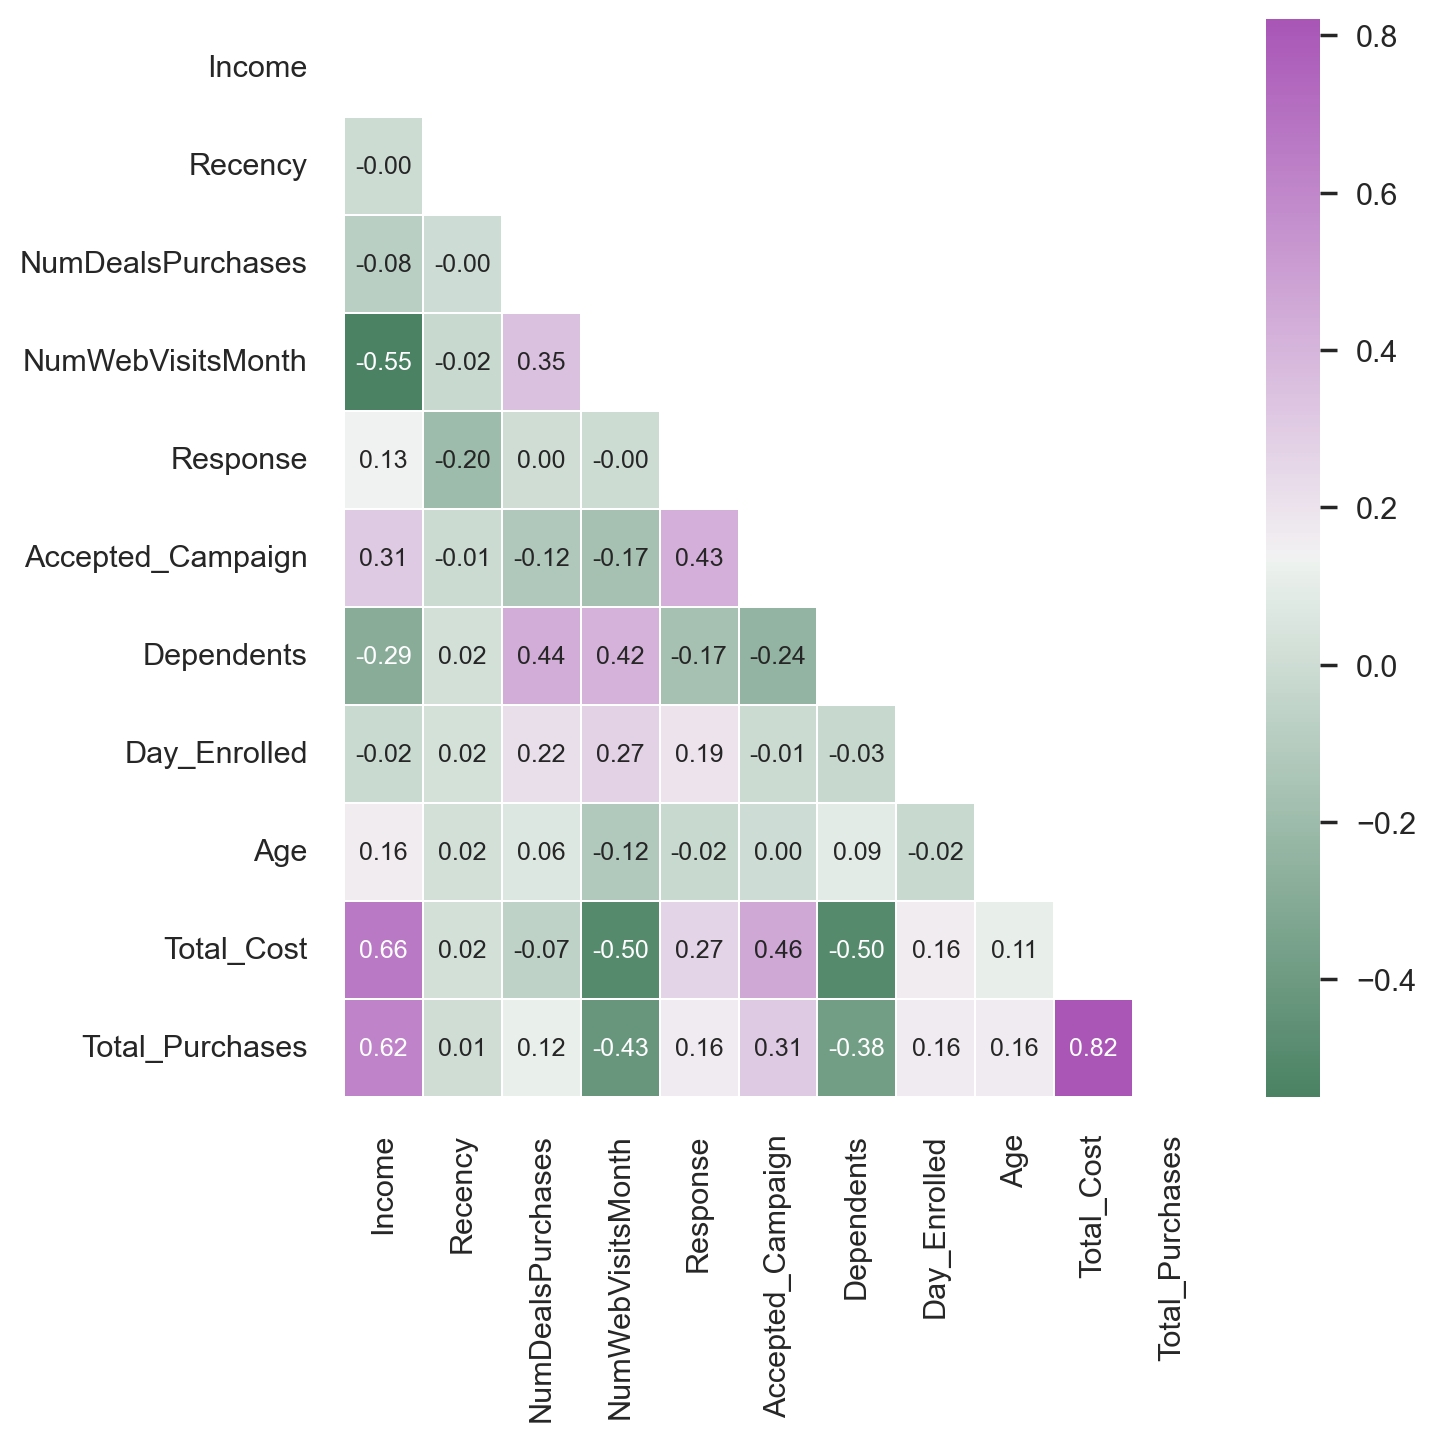

In [29]:
corr = cleaned_df.corr(numeric_only=True)

plt.figure(figsize=(7,7))
sns.heatmap(corr, 
            mask=np.triu(corr), 
            annot=True, 
            cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True), 
            linecolor='w', 
            linewidth=0.1, 
            fmt='.2f', 
            annot_kws={'size':9});

**Note:**

1. **Income and Total_Cost**: The correlation between 'Income' and 'Total_Cost' is notably strong (0.66). This suggests that customers with higher incomes tend to have higher total costs.

2. **NumWebVisitsMonth and Total_Purchases**: There is a relatively strong negative correlation between 'NumWebVisitsMonth' and 'Total_Purchases' (-0.43). This implies that as the number of web visits per month decreases, the total number of purchases tends to increase.

3. **Accepted_Campaign and Response**: The variables 'Accepted_Campaign' and 'Response' have a positive correlation of 0.43. This suggests that customers who responded positively to campaigns are more likely to have accepted those campaigns.

4. **Total_Cost and Total_Purchases**: 'Total_Cost' and 'Total_Purchases' are highly positively correlated (0.82). This indicates that higher total costs correspond to a higher number of total purchases.

5. **Age and Total_Purchases**: 'Age' and 'Total_Purchases' have a positive correlation of 0.16. This indicates that, in general, older customers tend to have more total purchases.

6. **Dependents and NumDealsPurchases**: 'Dependents' and 'NumDealsPurchases' have a relatively strong positive correlation (0.44). This suggests that customers with more dependents tend to make more deal purchases.

7. **Recency and Response**: There is a negative correlation between 'Recency' and 'Response' (-0.20). This implies that customers who made recent interactions are less likely to respond positively to campaigns.


## 3. Preprocessing

### 3.1. Encoding

In [30]:
education_dummies = pd.get_dummies(cleaned_df['Education'], prefix='Education')
marital_dummies = pd.get_dummies(cleaned_df['Marital_Status'], prefix='Marital_Status')
education_dummies.shape, marital_dummies.shape

((2240, 4), (2240, 2))

### 3.2. Scale the Data

- I will scale only numerical data and then concatenate them back with encoded `education_dummies` and `marital_dummies`

In [31]:
numerical_names = corr.columns.tolist()
numerical_data = cleaned_df[numerical_names].copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
scaled_data = pd.DataFrame(scaled_data, columns=numerical_names)

scaled_data = pd.concat([education_dummies, marital_dummies, scaled_data], axis=1)
scaled_data.head()

Education_Basic  Education_Graduation  Education_Master  Education_PhD  \
0                0                     1                 0              0   
1                0                     1                 0              0   
2                0                     1                 0              0   
3                0                     1                 0              0   
4                0                     0                 0              1   

   Marital_Status_Relationship  Marital_Status_Single  Income  Recency  \
0                            0                      1    0.24     0.31   
1                            0                      1   -0.24    -0.38   
2                            1                      0    0.77    -0.80   
3                            1                      0   -1.02    -0.80   
4                            1                      0    0.24     1.55   

   NumDealsPurchases  NumWebVisitsMonth  Response  Accepted_Campaign  \
0               0.35               0.69      2.39              -0.44   
1              -0.17              -0.13     -0.42              -0.44   
2              -0.69              -0.54     -0.42              -0.44   
3              -0.17               0.28     -0.42              -0.44   
4               1.38              -0.13     -0.42              -0.44   

   Dependents  Day_Enrolled   Age  Total_Cost  Total_Purchases  
0       -1.26          1.53  0.99        1.68             1.31  
1        1.40         -1.19  1.24       -0.96            -1.19  
2       -1.26         -0.21  0.32        0.28             1.04  
3        0.07         -1.06 -1.27       -0.92            -0.91  
4        0.07         -0.95 -1.02       -0.31             0.20

In [32]:
scaled_data.shape

(2240, 17)

## 4. Dimensionality Reduction

Dimensionality reduction is a crucial technique in data analysis and machine learning. It serves various purposes, including:

1. **Curse of Dimensionality:** With an increase in the number of features, data volume grows exponentially. This can lead to storage, computational, and analysis challenges. High dimensions often result in sparse data, making it harder to extract meaningful insights.

2. **Improved Model Performance:** Some machine learning algorithms struggle with high-dimensional data, leading to overfitting. Dimensionality reduction can alleviate this issue by reducing noise and improving model generalization.

3. **Visualization:** Visualizing data in high dimensions is challenging. Dimensionality reduction techniques project data into lower-dimensional spaces (e.g., 2D or 3D), aiding visualization and understanding.

4. **Noise Reduction:** High-dimensional data often contains noise or irrelevant features. Dimensionality reduction can filter out noise and retain essential information.

In our dataframe (`cleaned_encoded_df`), we currently have 17 features, which represent a 17-dimensional space. Managing and interpreting data in such a high-dimensional space can be complex and resource-intensive. To address this, Principal Component Analysis (PCA) will be applied to reduce dimensionality while retaining the most critical information.

### 4.1. Initialize PCA object

Let's start with `n_components = 3`

In [33]:
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

In [34]:
pca_data = pca.transform(scaled_data)
pca_data

array([[ 2.04439308,  2.31707746, -0.51823267],
       [-1.60621049, -0.93211446,  0.73430373],
       [ 1.45289161, -0.84019837,  0.22872329],
       ...,
       [ 1.46662271, -0.94851091, -0.43401638],
       [ 1.1963261 , -0.67325204,  1.04476017],
       [-0.95154074,  2.1165869 , -0.44134608]])

Let's plot the result on the scree plot:

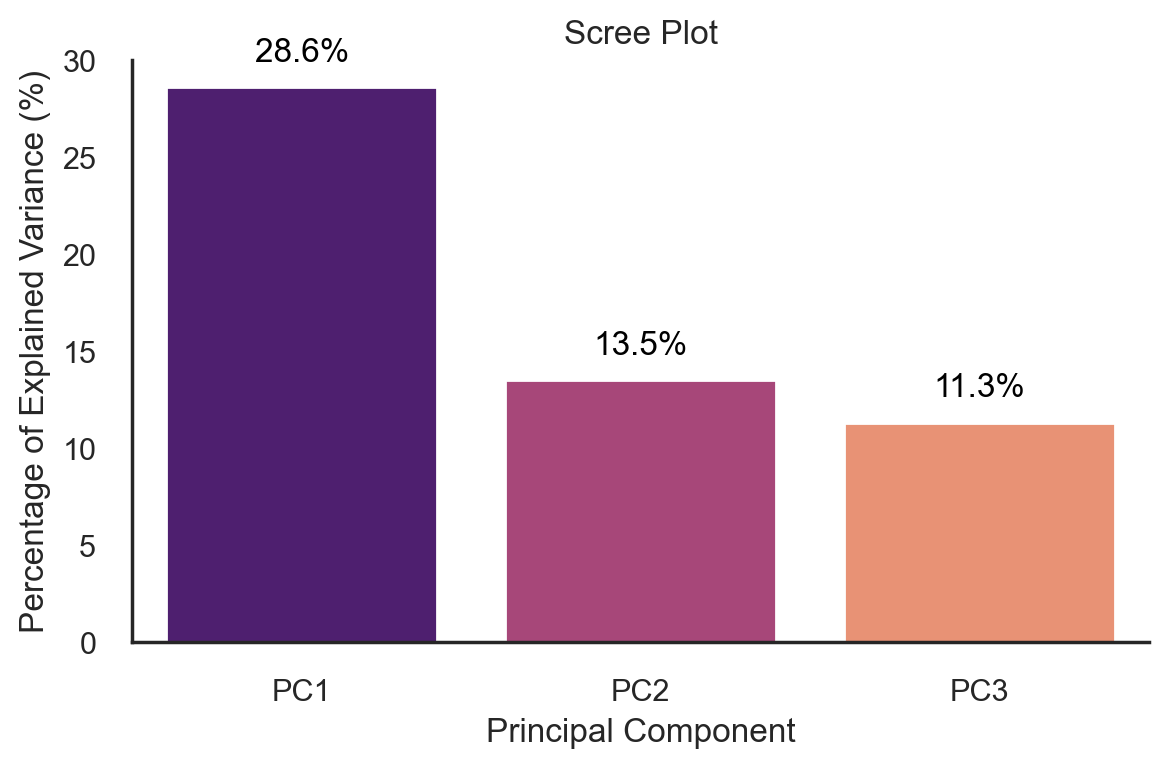

In [35]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=per_var, palette='magma')
plt.ylabel('Percentage of Explained Variance (%)')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.tight_layout()
sns.despine()

for i, v in enumerate(per_var):
    plt.text(i, v + 1, str(v) + '%', color='black', ha='center', va='bottom')


**Note:**
With the specified number of components (n=3). The variance explained by each of the first three principal components is as follows:

- **PC1**: Explains approximately 28.6% of the total variance.
- **PC2**: Explains approximately 13.5% of the total variance.
- **PC3**: Explains approximately 11.3% of the total variance.

These percentages indicate the proportion of the original variance retained in each principal component. Since we're using the first three principal components,  the PCA has captured a total of around 53.4% of the total variance in the data.

This reduction in dimensionality will help streamline your data representation while preserving a substantial portion of its variability.

In [36]:
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df

pc1_values = pca_df['PC1']
pc2_values = pca_df['PC2']
pc3_values = pca_df['PC3']

fig = px.scatter_3d(pca_df, x=pc1_values, y=pc2_values, z=pc3_values)
fig = px.scatter_3d(pca_df, x=pc1_values, y=pc2_values, z=pc3_values, title='3D Scatter Plot of PC1, PC2, and PC3')
fig.update_layout(scene=dict(xaxis_title='PC1 - {0}%'.format(per_var[0]),
                             yaxis_title='PC2 - {0}%'.format(per_var[1]),
                             zaxis_title='PC3 - {0}%'.format(per_var[2])))
fig.show();

### 4.2. Identify the Optimal Number of Components

When deciding the number of principal components to retain, we will encounter a trade-off between reducing dimensionality and preserving information. This trade-off is influenced by the threshold we set for the variance explained. 

- **Higher Threshold (e.g., 95% Variance Explained)**:
Choosing a higher threshold, like capturing 95% variance explained, emphasizes retaining as much information as possible. This leads to keeping more principal components, resulting in a higher-dimensional representation of the data. While it preserves a significant portion of the original variability, it might necessitate more components.

- **Lower Threshold (e.g., 50% Variance Explained)**:
Opting for a lower threshold, such as 50% variance explained, prioritizes dimensionality reduction. In this case, some information is sacrificed to achieve a substantial reduction in dimensionality. Although this approach results in a lower-dimensional data representation, it might not capture all subtle variations in the original data.

#### To determine the optimal number of components, I will apply two criteria:

- ##### Total Variance Criterion: 
I will consider retaining a number of components that collectively **explain for 50 to 70% of total variance**.

- #####  Kaiser Criterion:
I will also employ the Kaiser criterion, which involves keeping principal components with **eigenvalues greater than 1**.

These two criteria will help guide the selection of the most suitable number of components for dimensionality reduction while preserving meaningful information.

#### Criterion #1 - Total Variance Criterion: 50-70% Cumulative Explained Variance

In [37]:
def find_components_near_threshold(data, from_threshold, to_threshold=None):
    """
    Find the number of principal components that explain the specified variance range/value.

    Parameters:
        data (array-like): The scaled data.
        from_threshold (float): The lower threshold for variance explained.
        to_threshold (float): The upper threshold for variance explained (optional).

    Returns:
        str: A string indicating the number of components that explain the specified variance range/value.
    """
    pca = PCA(n_components='mle', random_state=42)
    pca.fit(data)
    
    cumulative_variance = 0
    n_from = None
    n_to = None
    
    # Return a n_component if to_threshold = None
    for n in range(1, len(pca.explained_variance_ratio_) + 1):
        cumulative_variance += pca.explained_variance_ratio_[n - 1]
        
        if cumulative_variance >= from_threshold:
            n_from = n
            break
            
    # Return a list of n_components if to_threshold != None
    if to_threshold is not None:
        for n in range(n_from + 1, len(pca.explained_variance_ratio_) + 1):
            cumulative_variance += pca.explained_variance_ratio_[n - 1]
            
            if cumulative_variance >= to_threshold:
                n_to = n
                break
    
    if n_from is None:
        return f"No components explained for at least {from_threshold*100}% variance"
    elif n_to is None:
        return f"Number of components explained for at least {from_threshold*100}% variance is {n_from}"
    else:
        return f"Numbers of components explained for {from_threshold*100}% to {to_threshold*100}% variance are {', '.join(map(str, range(n_from, n_to)))}"


In [38]:
result1 = find_components_near_threshold(scaled_data, 0.5)
result2 = find_components_near_threshold(scaled_data, 0.5, 0.7)
print(result1)
print()
print(result2)

Number of components explained for at least 50.0% variance is 3

Numbers of components explained for 50.0% to 70.0% variance are 3, 4, 5


I will create a table showing Explained Variance by using `pca.explained_variance_ratio_` so we can observe more easily:

In [39]:
variance_df = pd.DataFrame(columns=['Explained Variance', 'Cumulative Explained Variance'])

for i in range(1, len(scaled_data.columns) + 1):
    pca = PCA(n_components=i)
    pca.fit(scaled_data)
    explained_variance = pca.explained_variance_ratio_.round(2)[i-1]
    cumulative_variance = pca.explained_variance_ratio_.sum().round(2)
    variance_df.loc[f'{i}'] = [explained_variance, cumulative_variance]

variance_df.index.name = 'n_components'
variance_df.T

n_components                     1    2    3    4    5    6    7    8    9  \
Explained Variance            0.29 0.13 0.11 0.09 0.08 0.07 0.05 0.04 0.03   
Cumulative Explained Variance 0.29 0.42 0.53 0.62 0.70 0.77 0.81 0.85 0.89   

n_components                    10   11   12   13   14   15   16   17  
Explained Variance            0.03 0.03 0.02 0.02 0.01 0.00 0.00 0.00  
Cumulative Explained Variance 0.92 0.94 0.97 0.99 1.00 1.00 1.00 1.00

Let's plot:

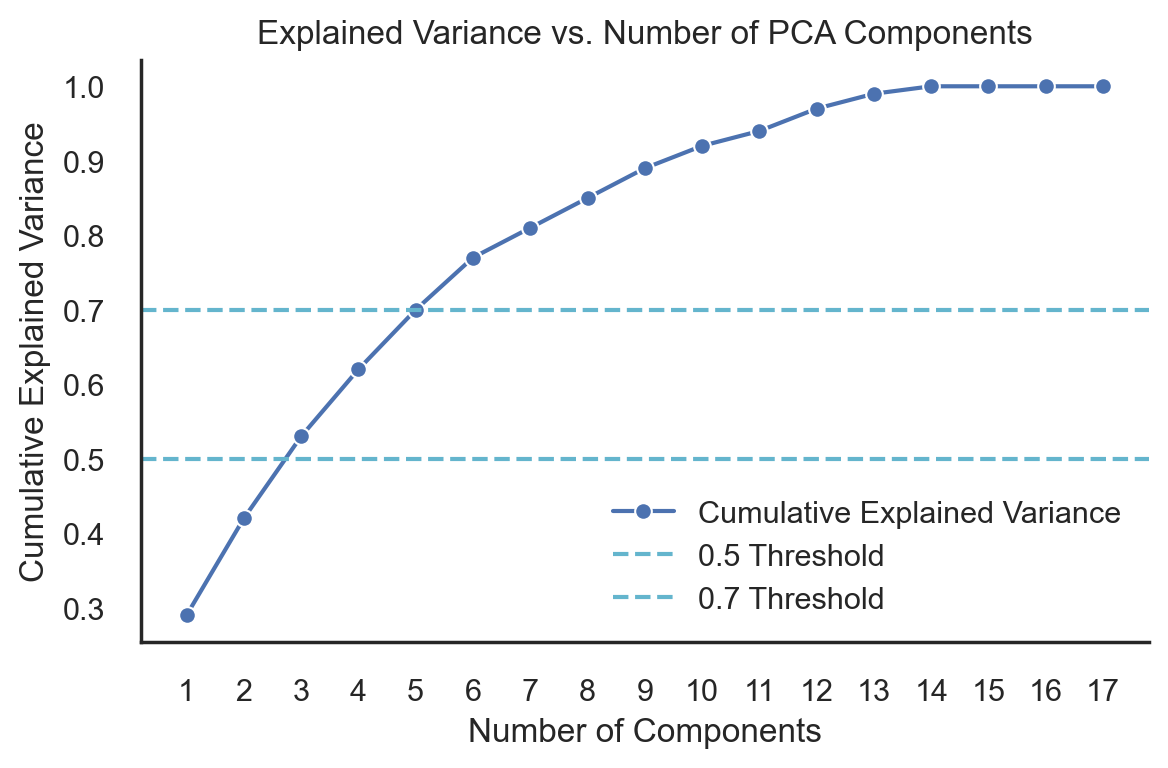

In [40]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=variance_df, x=variance_df.index, y='Cumulative Explained Variance', marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.5, color='c', linestyle='--', label='0.5 Threshold')
plt.axhline(y=0.7, color='c', linestyle='--', label='0.7 Threshold')

plt.title('Explained Variance vs. Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.tight_layout();


**Note:**

As the result in the function, we have `n_components = [3, 4, 5]` as Explained Variance is in 50-70% range.

Now let's move to the next criterion.

#### Criterion #2 - Kaiser Criterion: Eigenvalues > 1

In [41]:
variance_df['Eigenvalue'] = pca.explained_variance_
variance_df.T

n_components                     1    2    3    4    5    6    7    8    9  \
Explained Variance            0.29 0.13 0.11 0.09 0.08 0.07 0.05 0.04 0.03   
Cumulative Explained Variance 0.29 0.42 0.53 0.62 0.70 0.77 0.81 0.85 0.89   
Eigenvalue                    3.46 1.63 1.37 1.07 0.91 0.83 0.55 0.49 0.41   

n_components                    10   11   12   13   14   15   16   17  
Explained Variance            0.03 0.03 0.02 0.02 0.01 0.00 0.00 0.00  
Cumulative Explained Variance 0.92 0.94 0.97 0.99 1.00 1.00 1.00 1.00  
Eigenvalue                    0.36 0.33 0.29 0.22 0.14 0.03 0.00 0.00

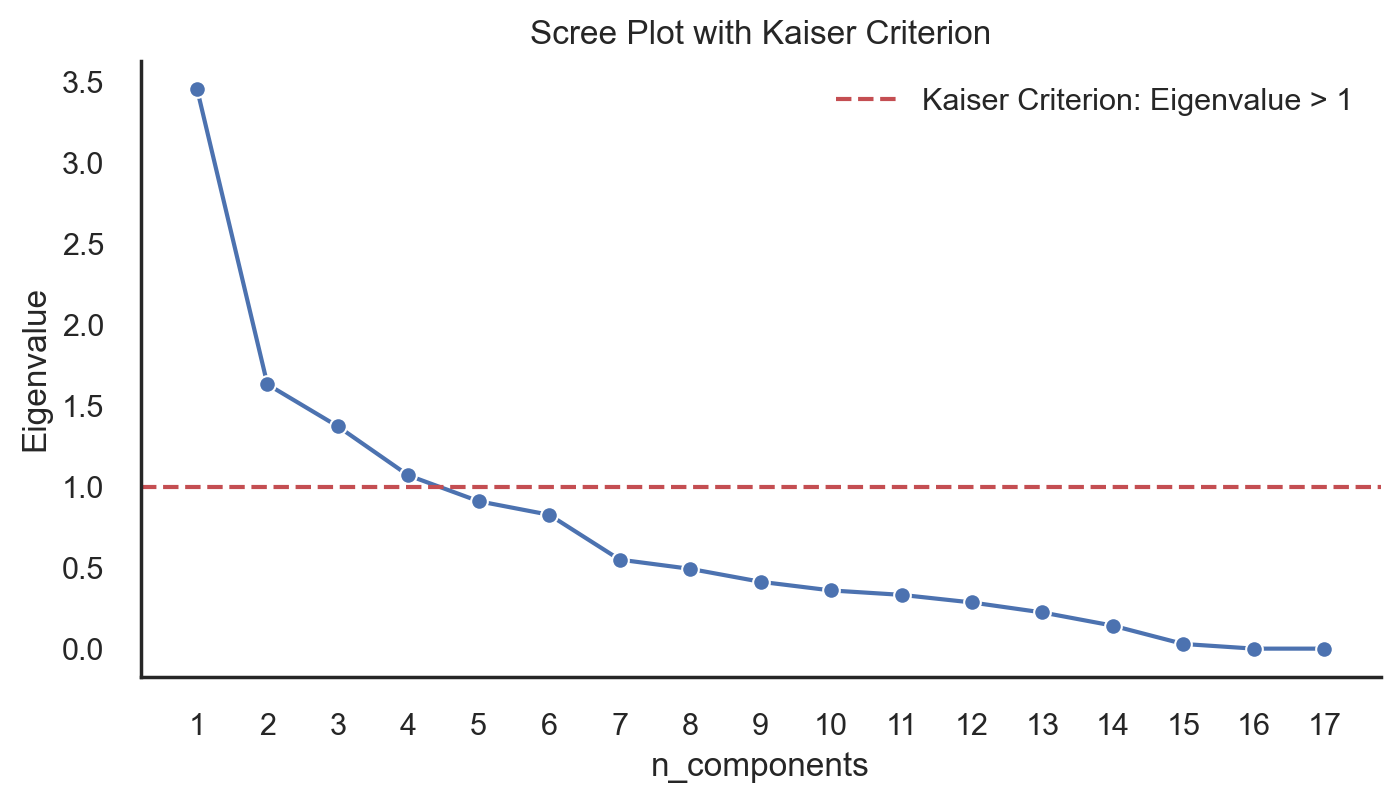

In [42]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=variance_df, x=variance_df.index, y='Eigenvalue', marker='o')
plt.xticks(variance_df.index)
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion: Eigenvalue > 1')
plt.title('Scree Plot with Kaiser Criterion')
plt.legend();

In [43]:
def find_components_eigenvalue_criterion(data):
    """
    Find the number of principal components based on the Kaiser Criterion (Eigenvalues > 1).

    Parameters:
        data (array-like): The scaled data.

    Returns:
        str: A string indicating the number of components based on the Kaiser Criterion.
    """
    cov_matrix = np.cov(data, rowvar=False)
    eigenvalues = np.linalg.eigvals(cov_matrix)
    n_components = np.sum(eigenvalues > 1)

    return f"Number of components based on Kaiser Criterion (Eigenvalues > 1): {n_components}"

In [44]:
find_components_eigenvalue_criterion(scaled_data)

'Number of components based on Kaiser Criterion (Eigenvalues > 1): 4'

### 4.3. Conclusion about n_components

**Criterion 1: Explained Variance (50-70%)**

When using the criterion of explained variance, we aim to find the number of principal components that collectively capture a substantial portion of the variability in the data. In this case, we are interested in components that explain between 50% and 70% of the total variance in the dataset. Using the function `find_components_near_threshold`, we determine that for this range, the optimal **number of components is 3, 4, and 5**. These components strike a balance between dimensionality reduction and information retention.

**Criterion 2: Kaiser Criterion (Eigenvalues > 1)**

The Kaiser Criterion involves examining the eigenvalues associated with the principal components. Eigenvalues indicate the amount of variance explained by each principal component. A common guideline is to retain only those components with eigenvalues greater than 1. When applying this criterion using the function `find_components_eigenvalue_criterion`, we identify that the **first 4 components have eigenvalues exceeding 1**. These components contribute significantly to the variability in the data.

**`n_components = 4`** to not only aligns with the Kaiser Criterion by retaining components with eigenvalues greater than 1, but it also satisfies the Explained Variance criterion by capturing a substantial portion of the variability in the data.


In [45]:
pca = PCA(n_components=4)
pca.fit(scaled_data)
pca_final = pd.DataFrame(
    pca.transform(scaled_data), 
    columns = (
        [
            "PC1", 
            "PC2", 
            "PC3", 
            "PC4",      
        ]
    )
)
pca_final.head()

PC1   PC2   PC3   PC4
0  2.04  2.32 -0.52 -0.56
1 -1.61 -0.93  0.73  1.70
2  1.45 -0.84  0.23  0.16
3 -1.70 -1.10 -0.98  0.21
4 -0.43 -0.18  1.09 -0.96

**Note:**
By reducing the dimensionality from 17 features to 5 principal components, we've effectively simplified the dataset while retaining the most critical information. This streamlined dataset is now more suitable for further analysis and modeling while avoiding the complexities associated with high-dimensional data.

## 5. Customer Segmentation using K-Means Clustering

In the next step of the analysis, I'll focus on customer segmentation using the K-Means clustering algorithm. To determine the optimal number of clusters (k) for our K-Means algorithm, I will employ the Elbow Method and the Silhouette Score to choose the optimal number of clusters.

**Elbow Method:**
- Visual approach to determine optimal cluster count
- Run K-Means for different k values
- Plot WCSS against the number of clusters
- Identify **"elbow point"** where WCSS reduction slows
- Indicates balance between minimizing variance and overfitting

**Silhouette Score:**
- Measures object similarity to its cluster and others
- Score range: -1 to 1
- **Higher score** means object matches its cluster well
- Helps evaluate cluster quality and select best k value

### 5.1. Initialize model

In [46]:
ranges=range(1,11)
inertia = []
sil_scores = []
for n in ranges:
    kmeans = KMeans(n_clusters=n, 
                    n_init=10, 
                    algorithm ='lloyd',
                    random_state=42)
    kmeans.fit(pca_final)
    inertia.append(kmeans.inertia_)
    
    if n > 1:
        sil_score = silhouette_score(pca_final, kmeans.labels_)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(0)

### 5.2. Choose k

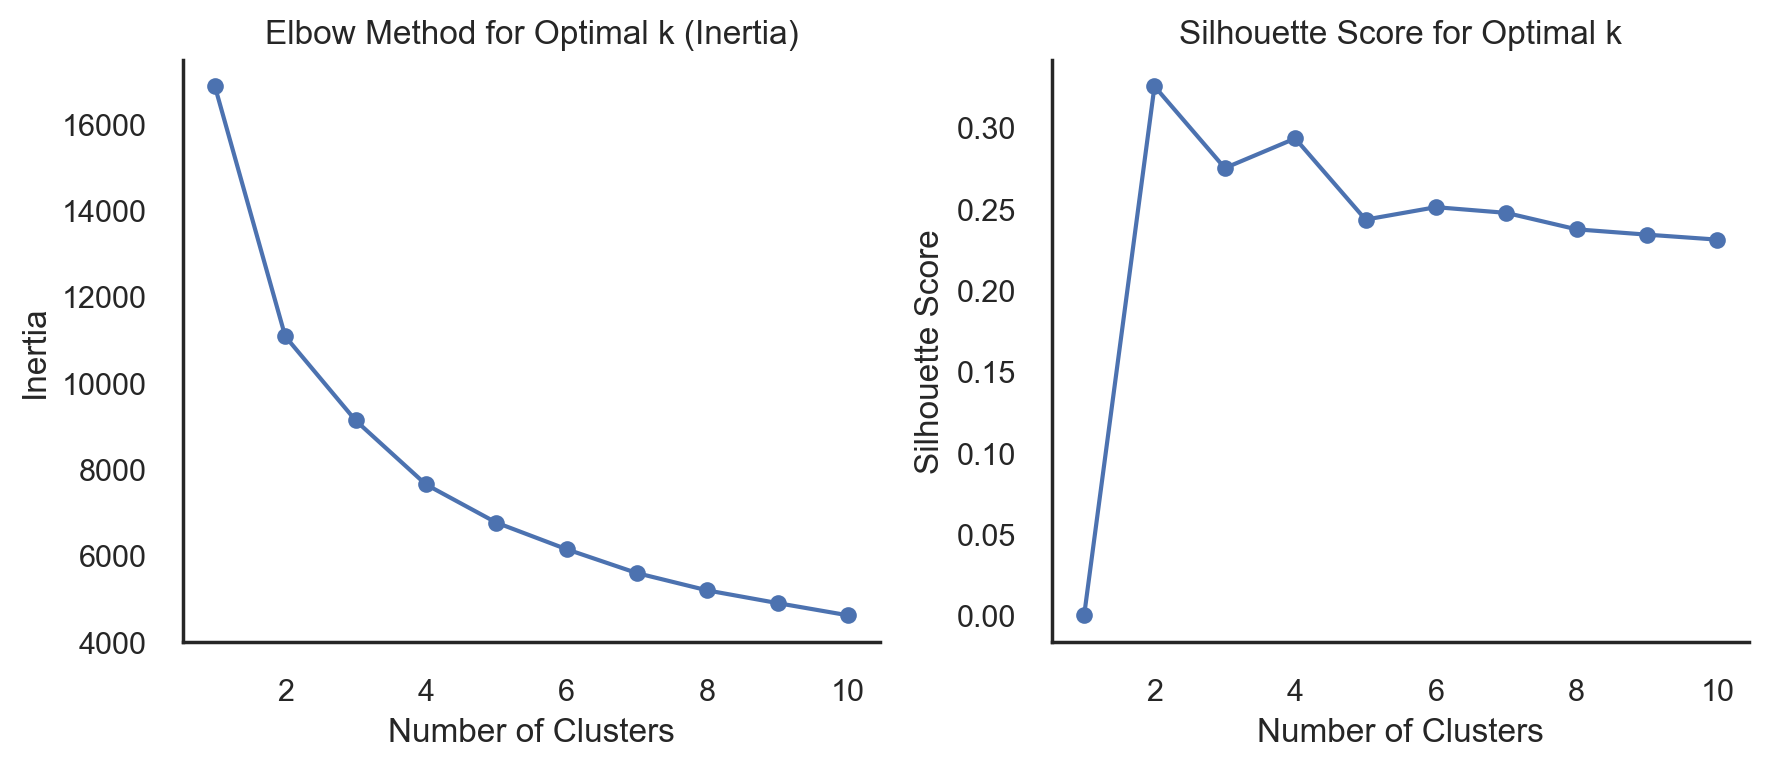

In [47]:
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(ranges, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Inertia)')

plt.subplot(1, 2, 2)
plt.plot(ranges, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.tight_layout();

Another way to plot:

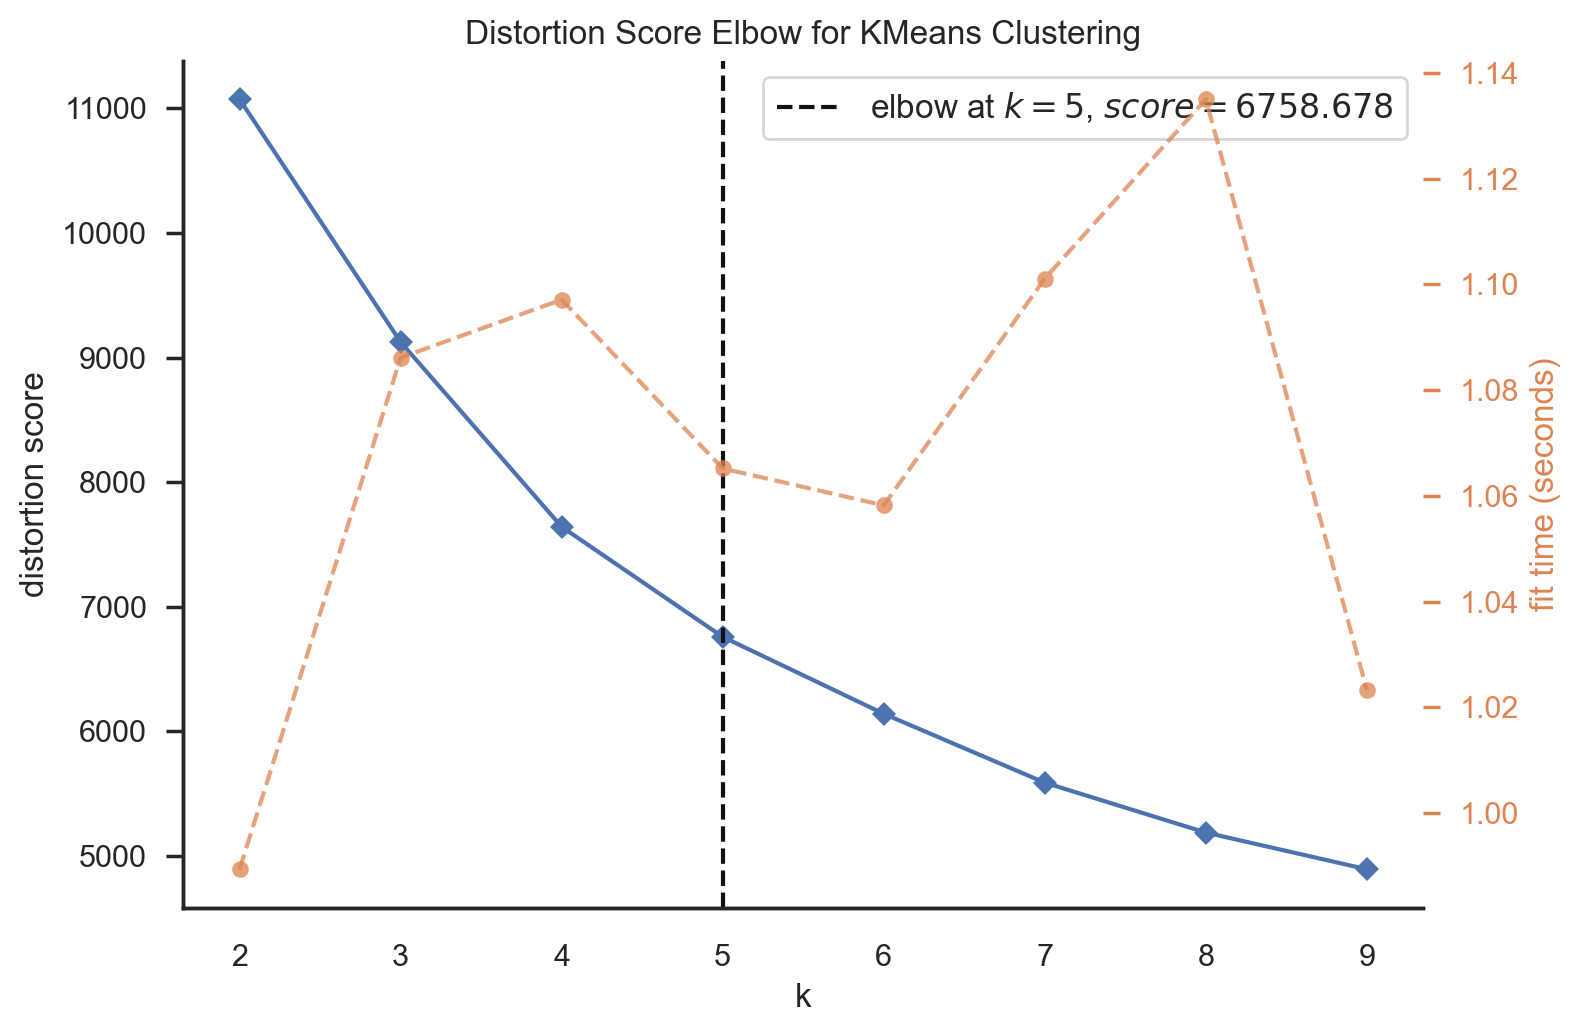

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
kmeans = KMeans(n_init=10, random_state=42)

elbow_visualizer = KElbowVisualizer(kmeans, k=(2,10))
elbow_visualizer.fit(pca_final)  
elbow_visualizer.show()

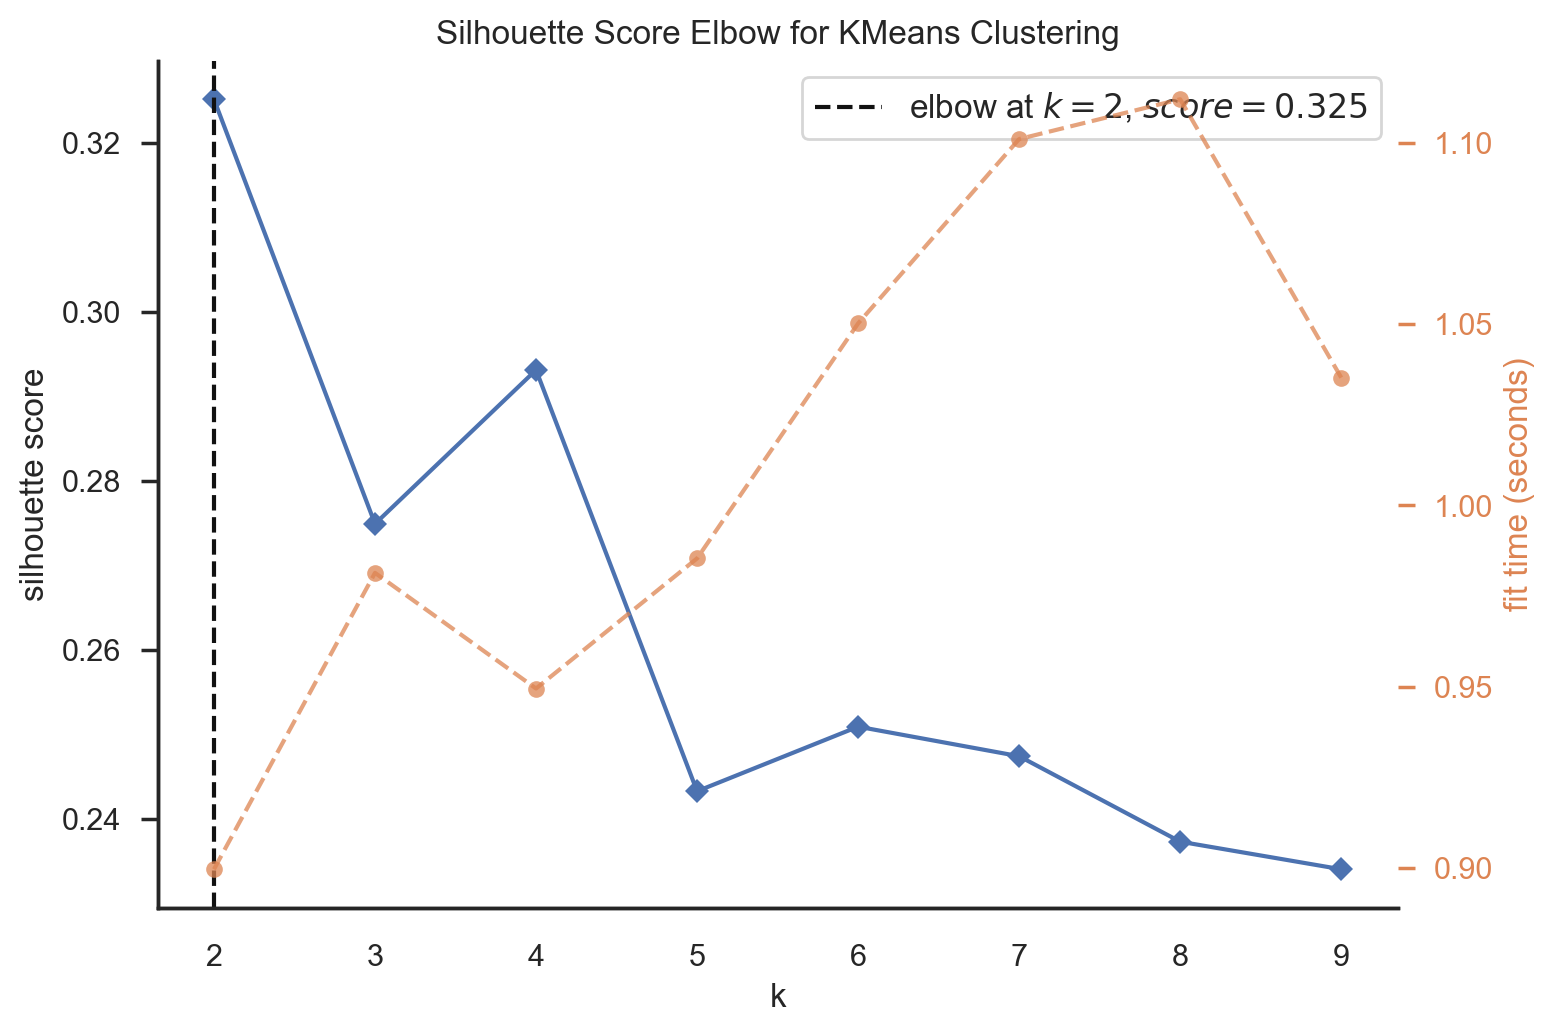

In [49]:
elbow_visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette')
elbow_visualizer.fit(pca_final)  
elbow_visualizer.show();

### 5.3. Determining the Optimal Number of Clusters: Elbow vs. Silhouette

In our quest to determine the optimal number of clusters for customer segmentation, we employed two distinct methods:

- **Elbow Method:** This method revealed a clear inflection point, or "elbow," at 4 clusters.

- **Silhouette Score:** The Silhouette Score, which measures the quality of clustering, was highest for 2 clusters but also exhibited a substantial peak at 4 clusters.

**Harmonization:** To make an informed decision, I sought harmony between the insights gained from the **Elbow Method** and the **Silhouette Score**. Notably, we observed a convergence between the second peak at 4 clusters in the Silhouette Score and the elbow point at 4 clusters in the Elbow Method. This led us to the final decision of **4 clusters** for our customer segmentation. This harmonious choice elegantly balances the reduction in inertia and the high quality of clustering.

In [50]:
kmeans = KMeans(n_clusters=4, 
                    n_init=10, 
                    random_state=42)
kmeans.fit(pca_final)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pca_final['Cluster'] = labels
df['Cluster'] = labels

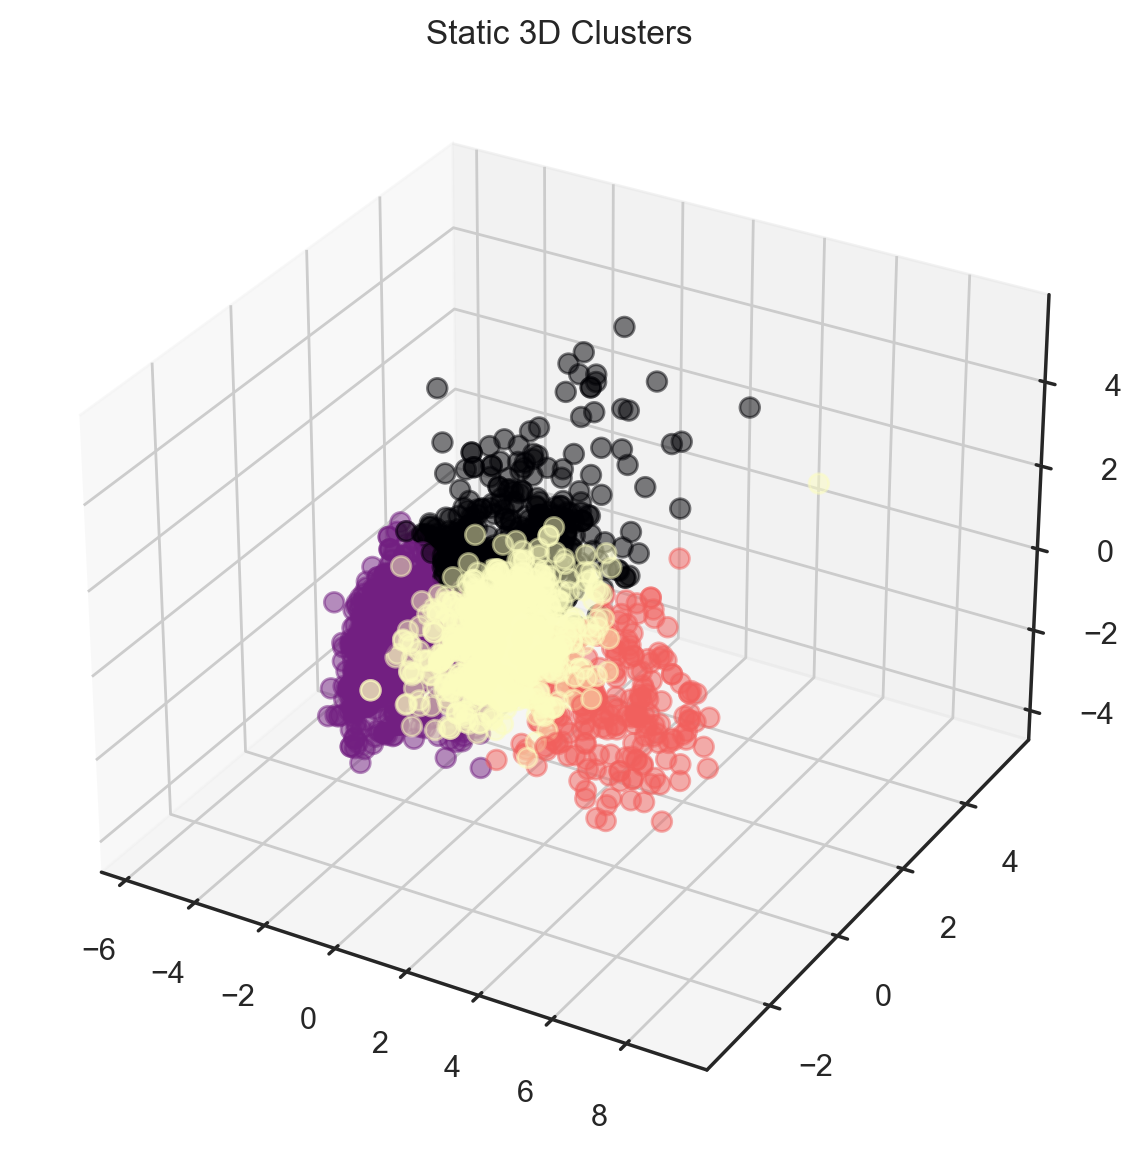

In [51]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(projection='3d')
ax.scatter(xs = pca_final["PC1"], 
           ys = pca_final["PC2"], 
           zs = pca_final["PC3"], 
           s=50, 
           c= pca_final["Cluster"], 
           marker='o', 
           alpha = 0.5, 
           cmap = 'magma')
plt.title("Static 3D Clusters");

In [52]:
fig = px.scatter_3d(pca_final, x='PC1', y='PC2', z='PC3', color='Cluster', opacity=0.1, color_continuous_scale='magma')
fig.update_layout(title='Interactive 3D Clusters with Centroids')

fig.add_scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
                  mode='markers', 
                  marker=dict(size=7, color='red', symbol='x'), 
                  showlegend=False)


## 6. Evaluate the Clusters

In [53]:
df.head(2)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.00        0         0   
1  2174        1954  Graduation         Single 46344.00        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response Year_Enrolled  Accepted_Campaign  \
0              3         11         1    2012-09-04                  0   
1              3         11         0    2014-03-08                  0   

   Dependents  Day_Enrolled  Age  Total_Cost  Total_Purchases  Cluster  
0           0           663   57        1617               22        2  
1           2           113   60          27                4        1

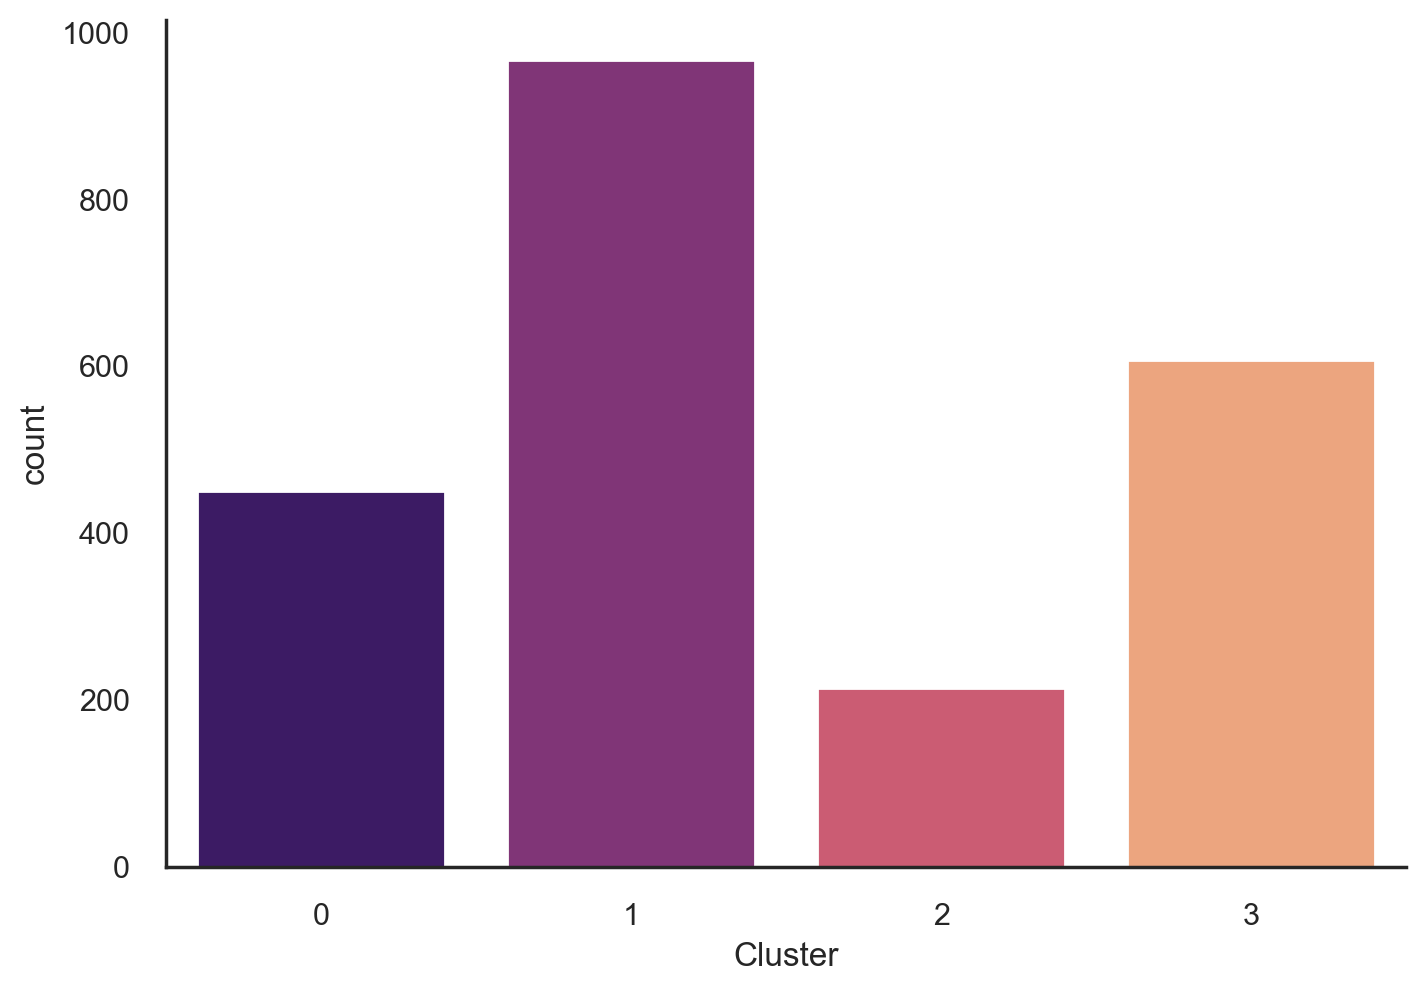

In [54]:
sns.countplot(x=df['Cluster'], palette='magma');

In [55]:
pd.pivot_table(data=df, index='Cluster', values = corr.columns.to_list(), margins=True).T

Cluster                  0        1        2        3      All
Accepted_Campaign     0.19     0.08     1.56     0.28     0.30
Age                  49.13    41.84    43.75    48.12    45.19
Day_Enrolled        503.12   305.19   415.62   297.79   353.58
Dependents            1.43     1.19     0.19     0.48     0.95
Income            52187.86 34457.78 76702.93 71942.84 52237.98
NumDealsPurchases     4.98     1.84     1.28     1.49     2.33
NumWebVisitsMonth     6.80     6.40     3.73     3.05     5.32
Recency              51.22    47.66    37.02    54.10    49.11
Response              0.16     0.07     0.87     0.01     0.15
Total_Cost          636.41    98.13  1508.51  1072.78   605.80
Total_Purchases      15.39     5.88    19.52    18.55    12.54

### Education and Marital_Status between Clusters

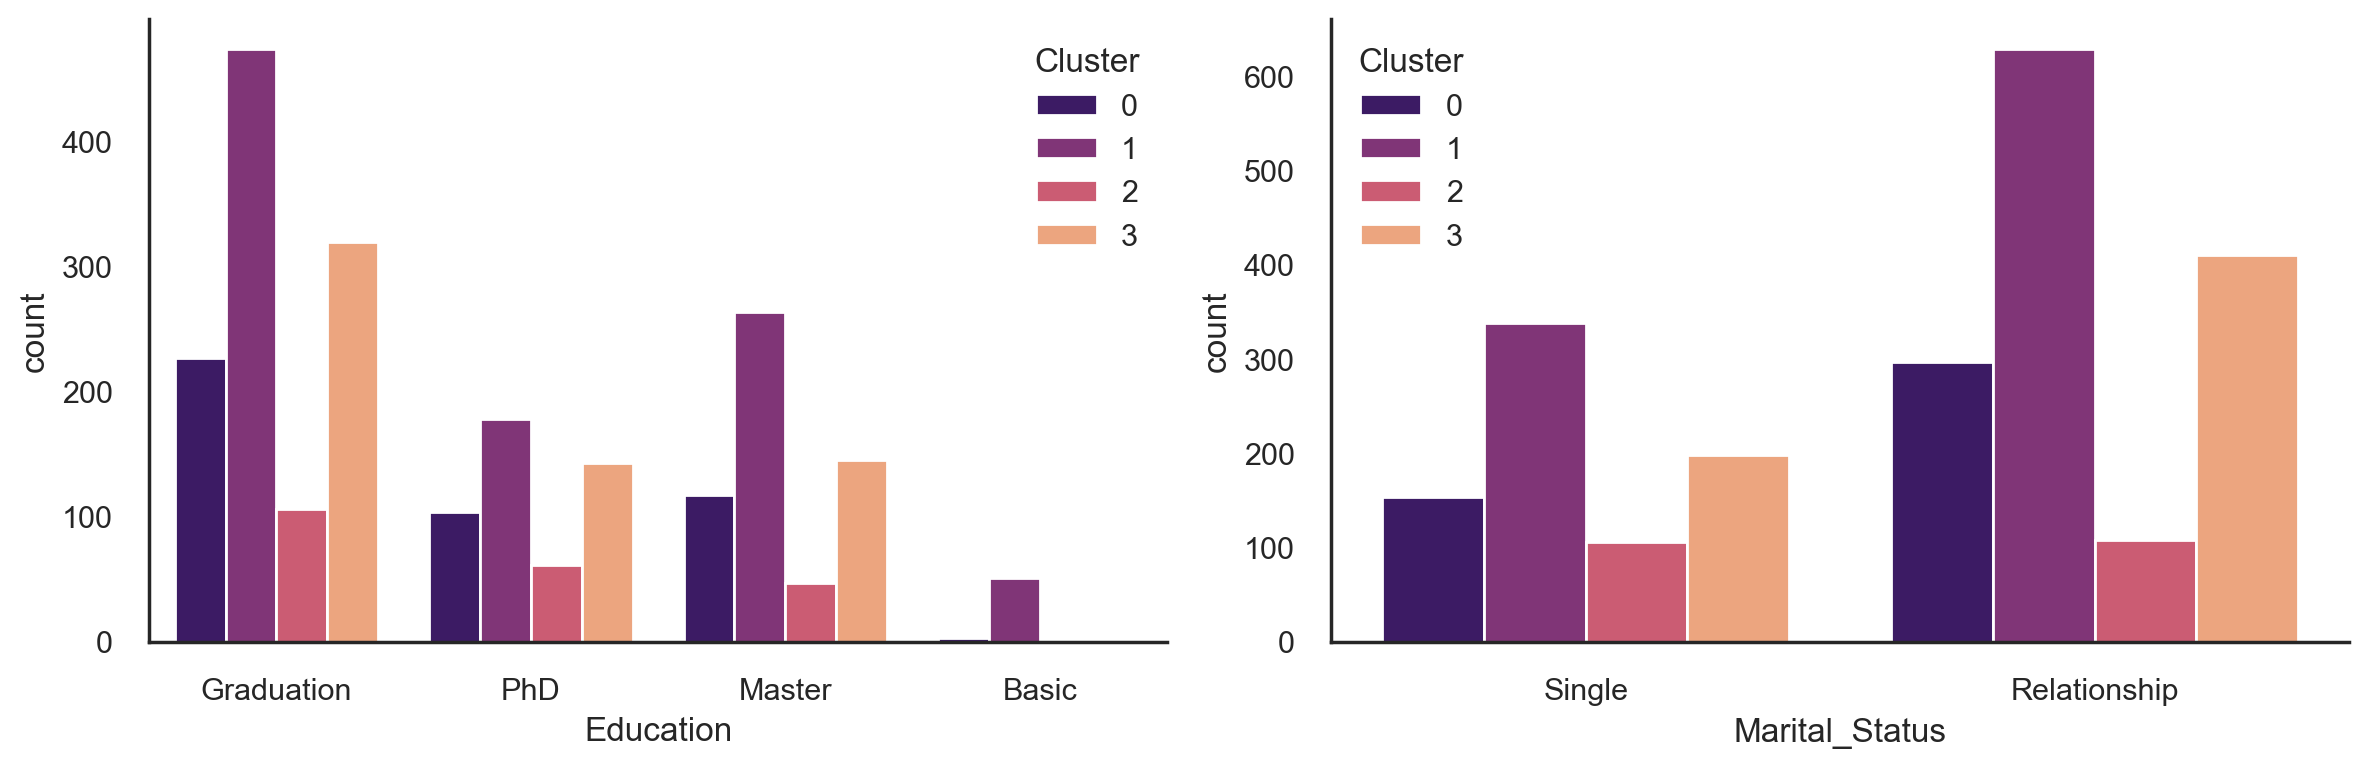

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x= 'Education', hue='Cluster', palette='magma');
plt.subplot(1,2,2)
sns.countplot(data=df, x= 'Marital_Status', hue='Cluster', palette='magma')
plt.tight_layout();

**Note:**

`Education` and `Marital_Status` appear to vary both within and among the customer segments, which means that these variables alone may not be the primary drivers of segment differentiation. In the context of the clustering analysis performed, it appears that other factors such as age, income, purchase behavior, and response to marketing campaigns have played a more significant role in distinguishing the segments.

## 7. Final conclusion

**Segment 0: Active and High-Spending Shoppers**

* **Segment Size:** This segment is the largest, with 967 customers.
* **Demographics:** They are relatively younger customers with a moderate income and 1 to 2 dependents.
* **Purchase Behavior:** They are active purchasers, engaging in deals and making an average of 1.84 deals and 6.40 web visits per month. They have a moderate recency, indicating that they make purchases relatively frequently.
* **Spending Habits:** They also have a higher `Total_Cost`, suggesting significant spending on various products in the last 2 years.
* **Campaign Response:** However, they have a low response rate to marketing campaigns (0.08), suggesting that traditional campaign strategies may not be very effective for them.
* **Recommendation:** Target this segment with exclusive deals and discounts, tailored to their high engagement and spending habits. It's essential to understand their preferences and what motivates them to respond to campaigns.

**Segment 1: Value-Conscious Savers**

* **Segment Size:** This segment has 608 customers.
* **Demographics:** They are relatively older customers with a high income and around 1 dependent.
* **Purchase Behavior:** They engage in deals moderately, with an average of 1.49 deals, and have a lower number of web visits (3.05) compared to Segment 0. They have a relatively high recency, indicating recent purchases.
* **Spending Habits:** They also have a significant `Total_Cost`, suggesting careful spending on various products in the last 2 years.
* **Campaign Response:** Surprisingly, despite their lower engagement, they have a moderate response rate to marketing campaigns (0.28).
* **Recommendation:** Build strong customer relationships and deliver personalized services to cultivate loyalty within this segment. They seem to respond well to campaigns, so tailoring campaigns to their preferences and values could be effective.

**Segment 2: Affluent Explorers**

* **Segment Size:** This segment has 214 customers, the lowest among segments.
* **Demographics:** They comprise relatively younger customers with very high income and minimal dependents.
* **Purchase Behavior:** They engage in deals moderately and have moderate web visits.
* **Spending Habits:** They also have a notable `Total_Cost`, indicating substantial spending on various products in the last 2 years.
* **Campaign Response:** Despite having a lower recency, they have a very high response rate to marketing campaigns (1.56).
* **Recommendation:** Craft marketing strategies to introduce novel offerings, emphasizing educational content to resonate with their curiosity. Despite their lower engagement frequency, their high response rate suggests a receptiveness to well-targeted campaigns.

**Segment 3: Established High-Income Shoppers**

* **Segment Size:** This segment has 451 customers.
* **Demographics:** They comprise relatively older customers with a moderate income and 1 to 2 dependents.
* **Purchase Behavior:** They are moderate purchasers, engaging in deals and making an average of 4.98 deals and 6.80 web visits per month.
* **Spending Habits:** They also have a notable `Total_Cost`, indicating significant spending on various products in the last 2 years.
* **Campaign Response:** They have a moderate response rate to marketing campaigns (0.16).
* **Recommendation:** Strategically target cross-selling and upselling campaigns to leverage their potential for elevated spending could be beneficial. These customers are active and engaged but may require specific offers to prompt them to respond to campaigns.
